
# CSCE633 Spring 2021 (Total 100 pts)

**Machine Learning**

**Homework 2**

Instructor: Yoonsuck Choe

Feb 09, 2021


---



**Student name: Jayaraman, Nimoshika **


---

# Common instructions (Read carefully)


**Submission:**

1. After you complete each section, "Save and pin" the revision. (**File -> Save and pin revision**). 
> There will be a 20-point penalty for not including revision history in the submission as instructed below.
2. When you're ready to submit, 
> 1. download the ipynb file (**File -> Download .ipynb**).
> 2. take screenshot of revision history, by comparing each successive pinned revisions (there will be several of these: final vs. latest pin, latest pin vs. previous pin, etc.). (**File -> Revision history**, then click on the radio buttons for pinned revisions to compare. Scroll down to the part that shows the major revised part, and take a screenshot. No need to show the entire revision history.)
> 3. submit a zip file **lastname-firstname.zip** containing the ipynb file and all revision screenshots.

**Using the markup language in the "text" boxes:**

Note: See https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0 for how to use the markdown when writing your answer in the text boxes.

**NEW: Including images/screenshots**

When including screenshots directly into the text cell, the markup source can get too long. To avoid this, you can upload your images to good drive, make them publicly viewable, get the share link, get the id string  from the link (for example, 1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy), and insert a tag like below:  
```
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy"> 
```


# Section I. Deterministic Case (total 60 points)

Consider the following reinforcement learning problem.


<figure>
<center>
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy" width="250">
<figcaption>Figure 1</figcaption></center>
</figure>



*   There are 12 states, and the actions are $\{ up, down, left, right \}$. Legal actions are those that go to the immediate neighbor, horizontally or vertically (but not diagonally). State $S_8$ is the goal state, and all actions here lead back to itself with reward 0.

*   The rewards for all action are 0, except for all actions that lead into $s_8$, which are 100 (as shown in the figure).

*   In all cases, assume $\gamma = 0.9$.

* Initially, all $Q(s,a) = 0$.




**Problem 1 (Written: 10pts):**

Consider the state action sequence of ($s_0$,right), ($s_1$, down), ($s_4$, down), ($s_7$, right), and suppose the $Q(s,a)$ values were updated during each move. 

(1) Starting with $Q(s,a)=0$ for all $(s,a)$, after one such pass, what would the resulting $Q(s,a)$ values be? 
* Note: Since one such pass has four actions, four $Q(s,a)$ values will be updated. 
* Note: Some values may be updated from 0 to 0, but this still counts as an update.  

(2) After two such passes, what would be the resulting $Q(s,a)$ values?

(3) After three such passes, what would be the resulting $Q(s,a)$ values?

(4) After four such passes, what would be the resulting $Q(s,a)$ values?


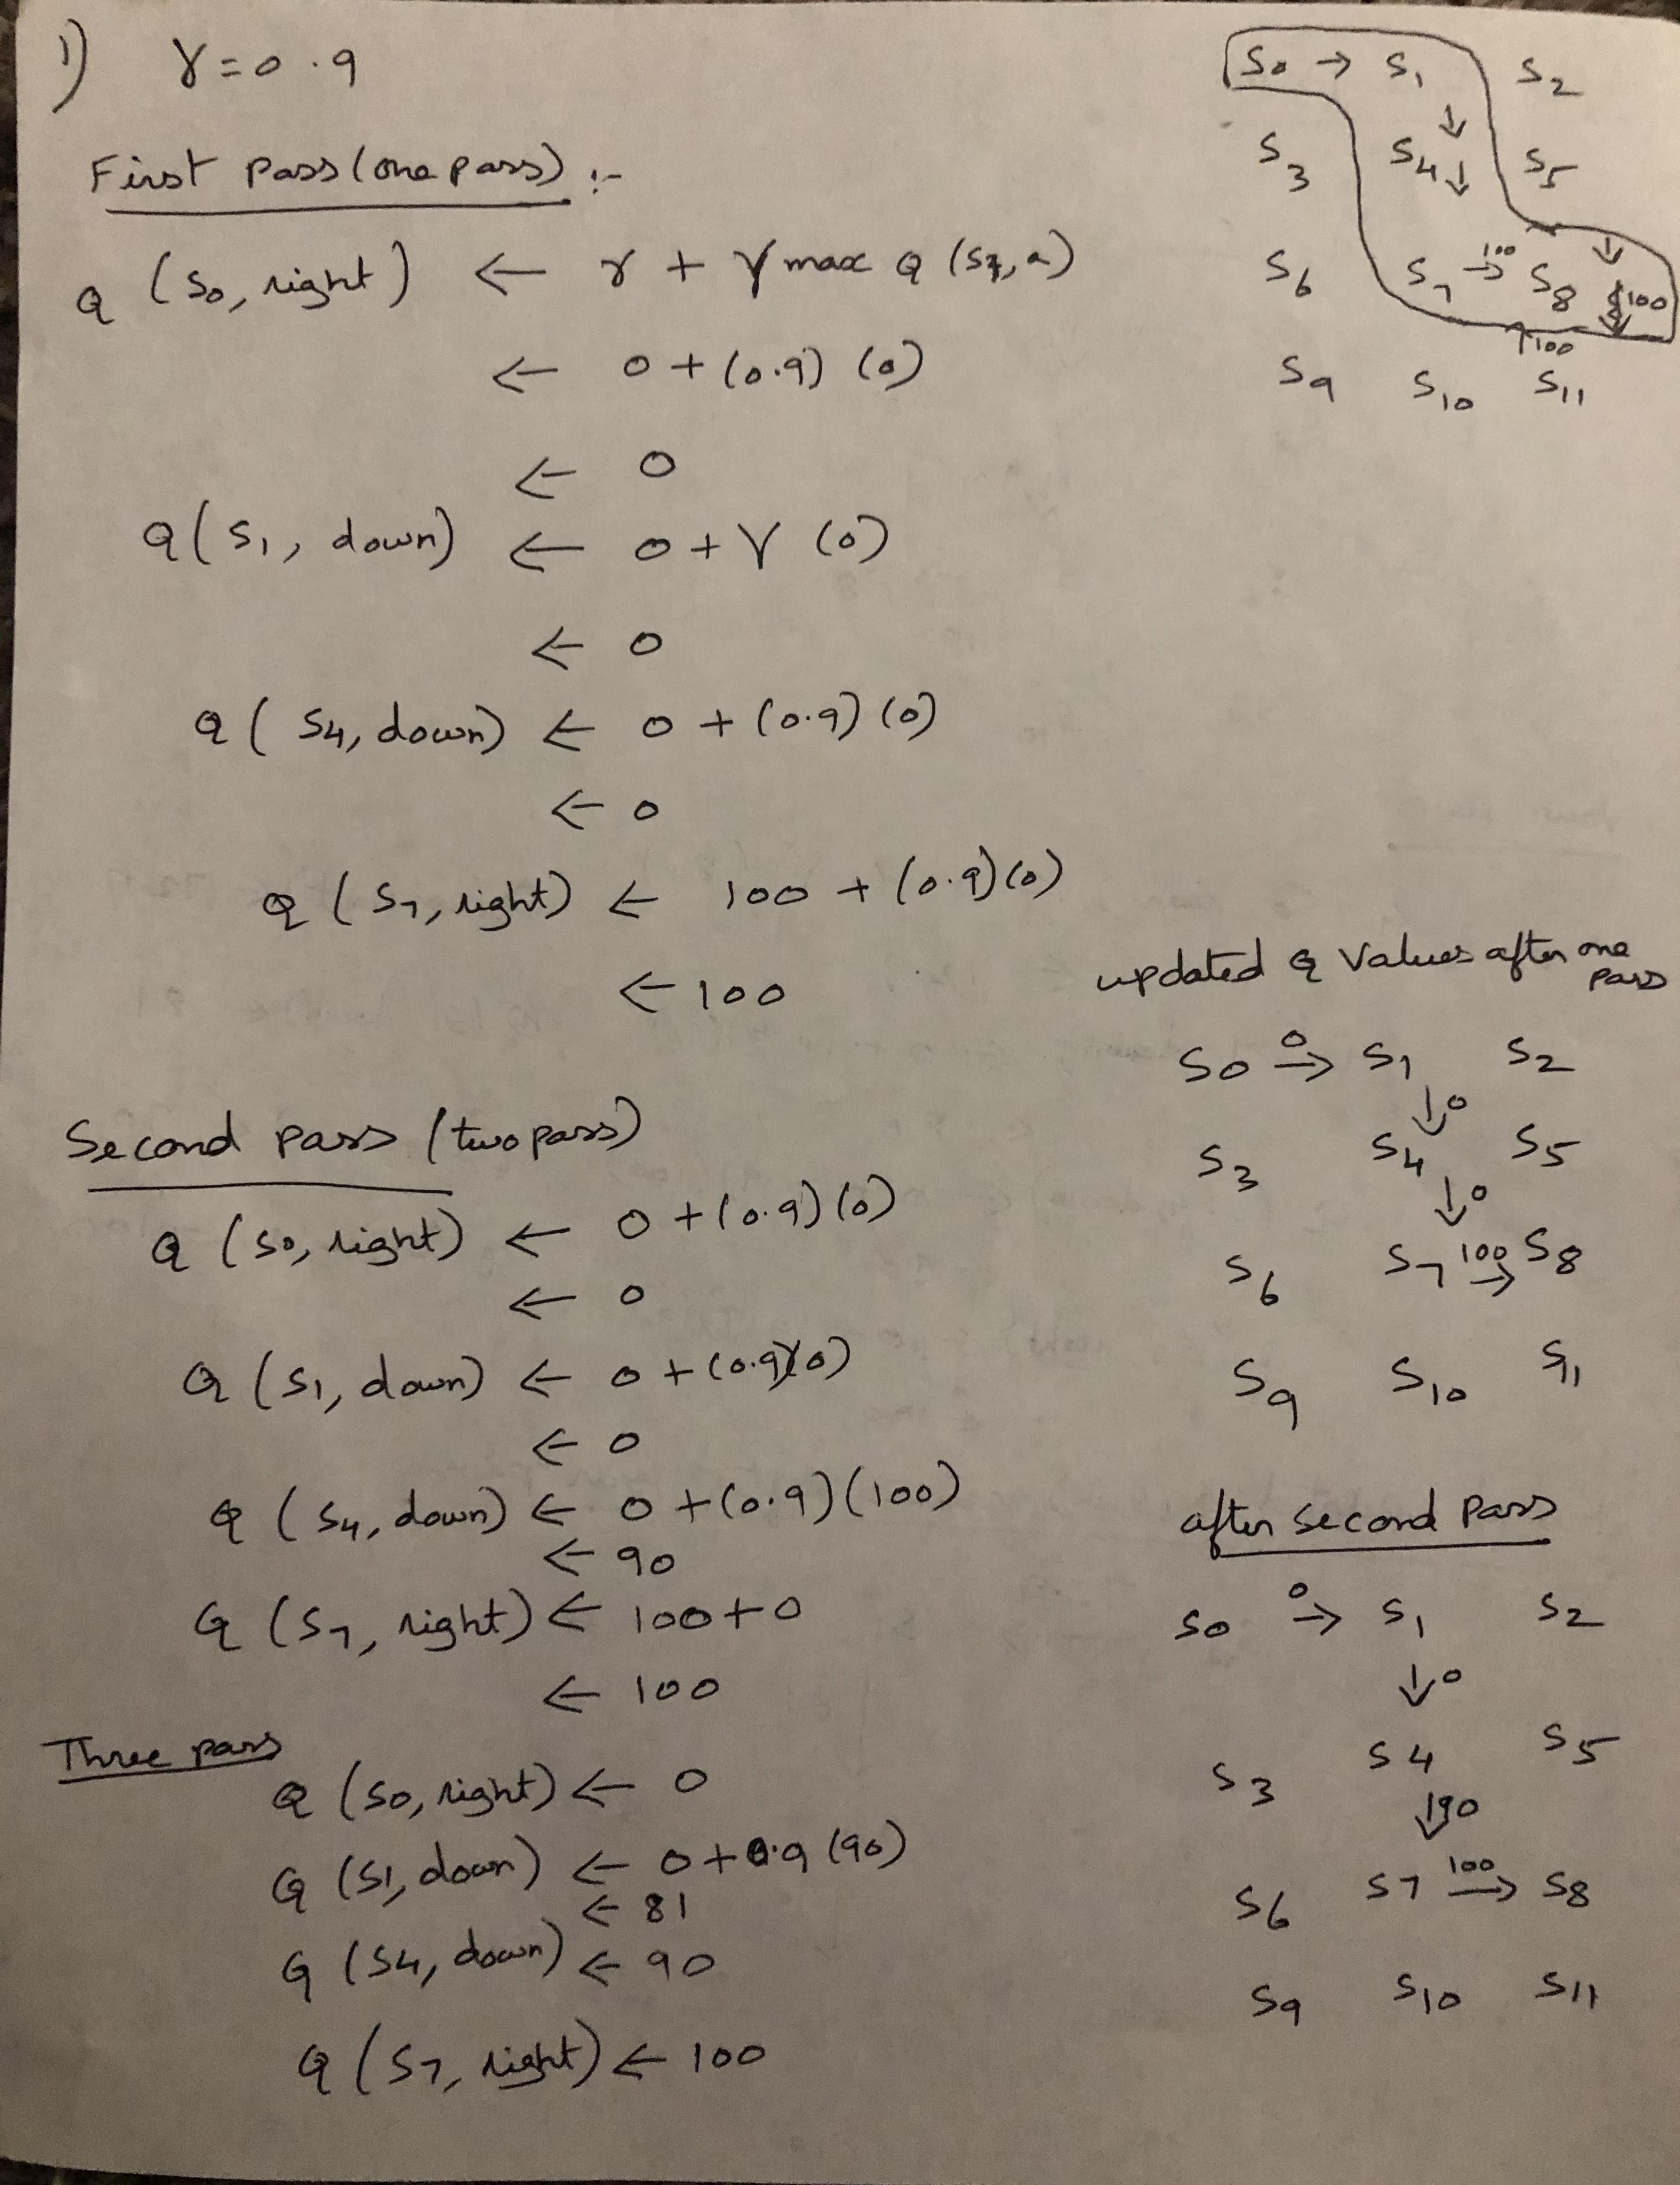**Answer**

(1)

(2)

(3)

(4)

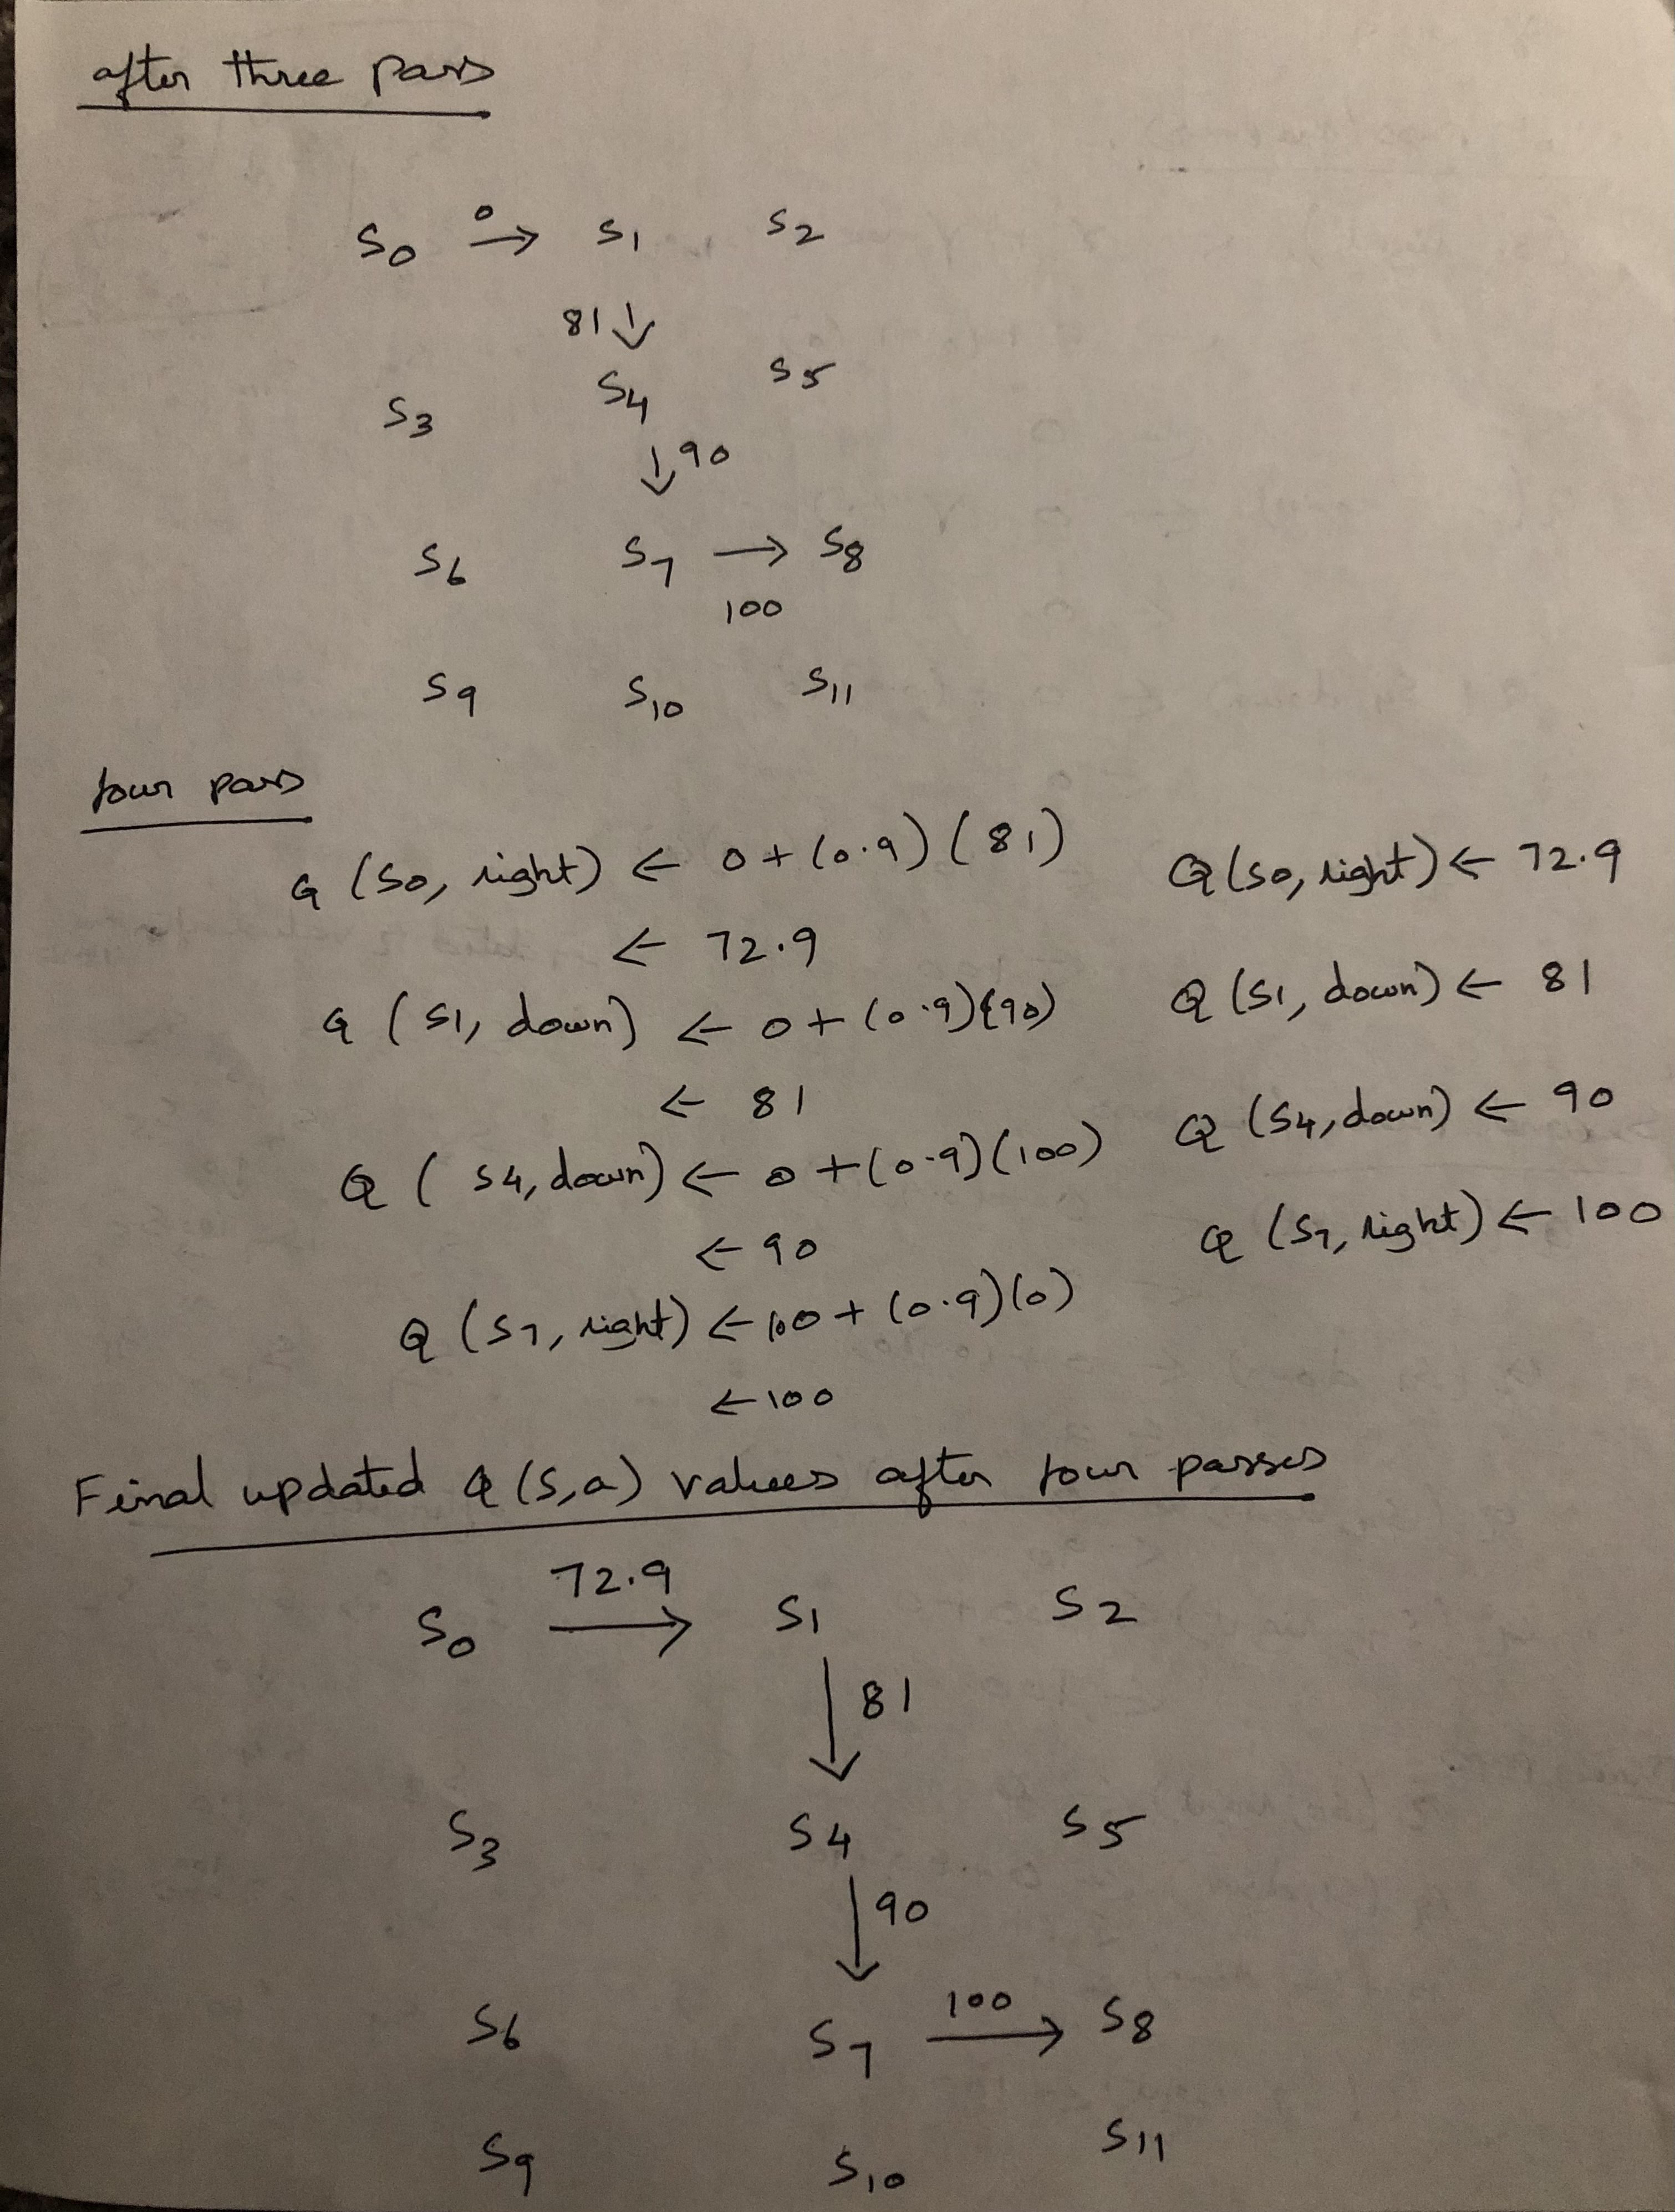

**Problem 2 (Written: 10pts):**

(1) Manually compute the optimal $V^*(s)$ for all states $s_0, s_1, ... s_{11}$. See slide04-rl.pdf, page 14. 

* The optimal policy $\pi^*$ is pretty straight-forward: Action that takes you to the next state that is one of the shortest path to the goal state (there could be one, or two or more such paths, depending on yout start state). 

* It is best if you start from $s_8$ and work backward: s_8, then all states that can reach s_8 in one move (they are $s_5, s_7$, and $s_{11}$), then all states that can reach s_8 in two moves, etc. 

* Hint: based on how many moves a state $s$ is away from the goal state, $V^*(s)$ has a form of $0 + \gamma 0 + \gamma^2 0 + \gamma^3 100 + \gamma^4 0 + ... = 0 + 0 + 0 + \gamma^3 100 + 0 + 0 + ... = \gamma^3 100 = 0.9^3 * 100 = 72.9$ (in case of four moves).  

(2) Manually compute the optimal $Q(s,a)$ for all $(s,a)$. See slide04-rl.pdf, page 26. You can quickly and directly compute this from $V^*(s)$ above. No need to recursively evaluate $Q(s,a)$. 

* Note: $Q(s,a) = r(s,a) + \gamma V^*(\delta(s,a))$



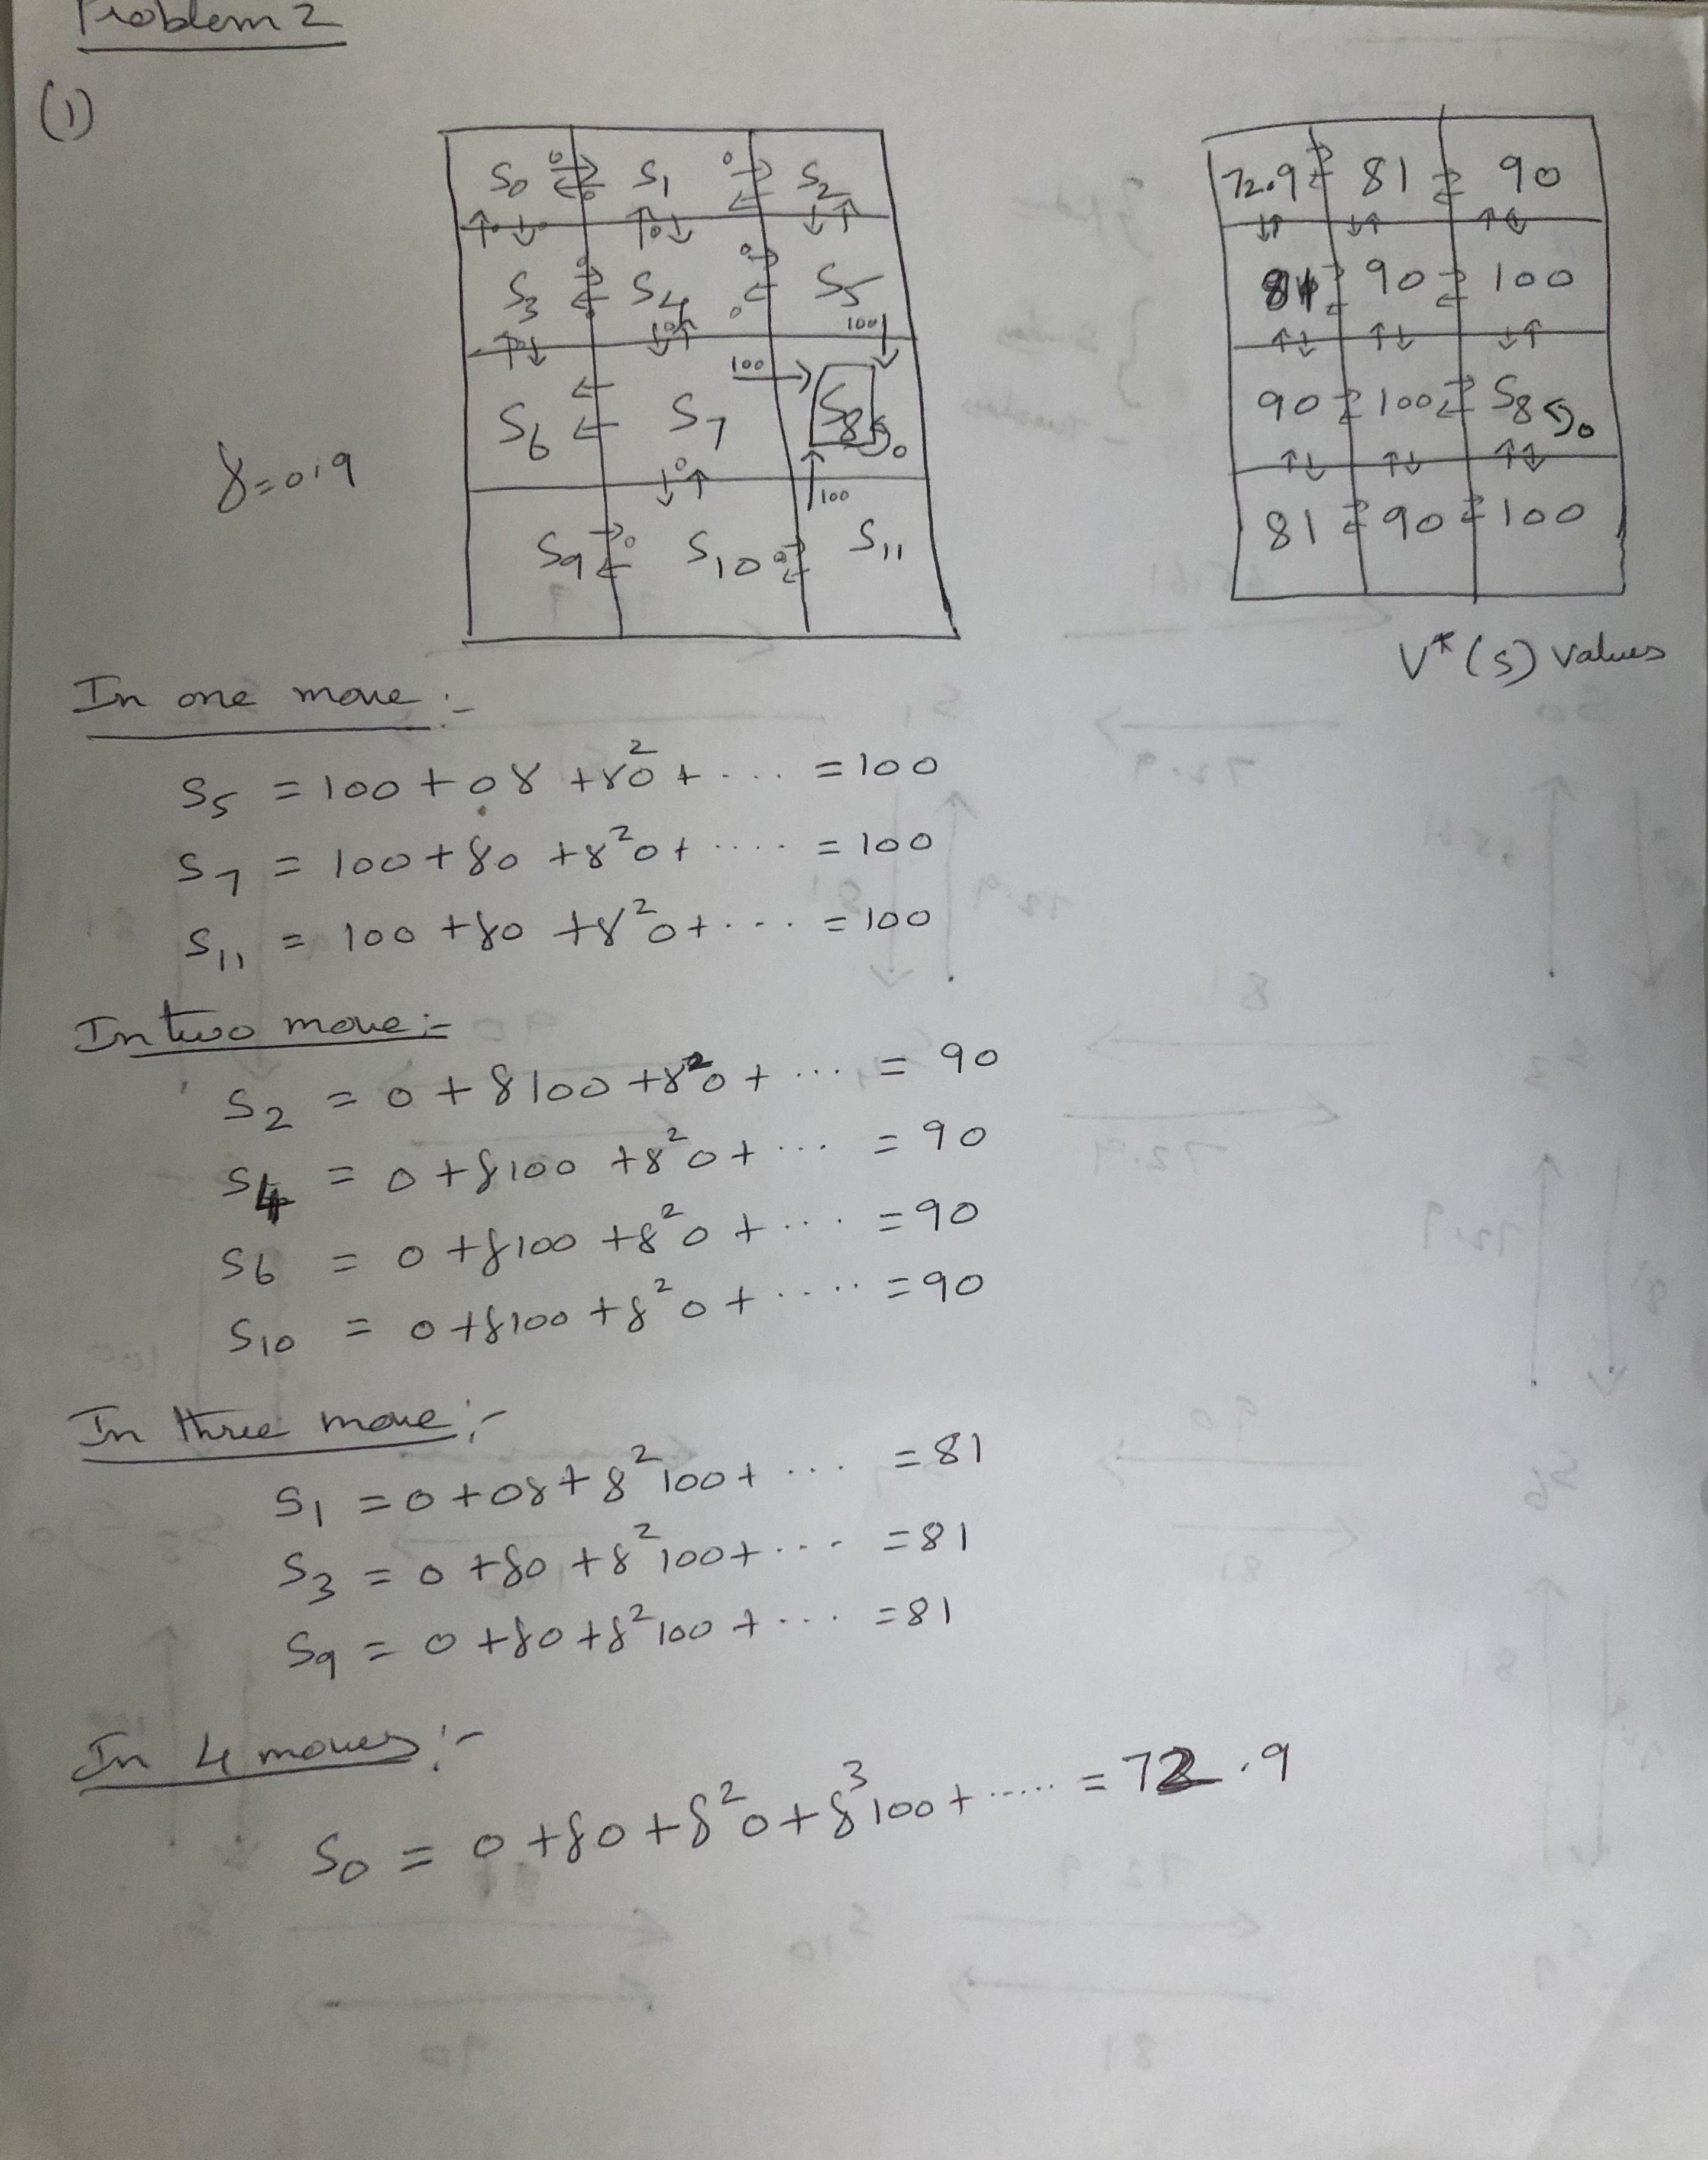

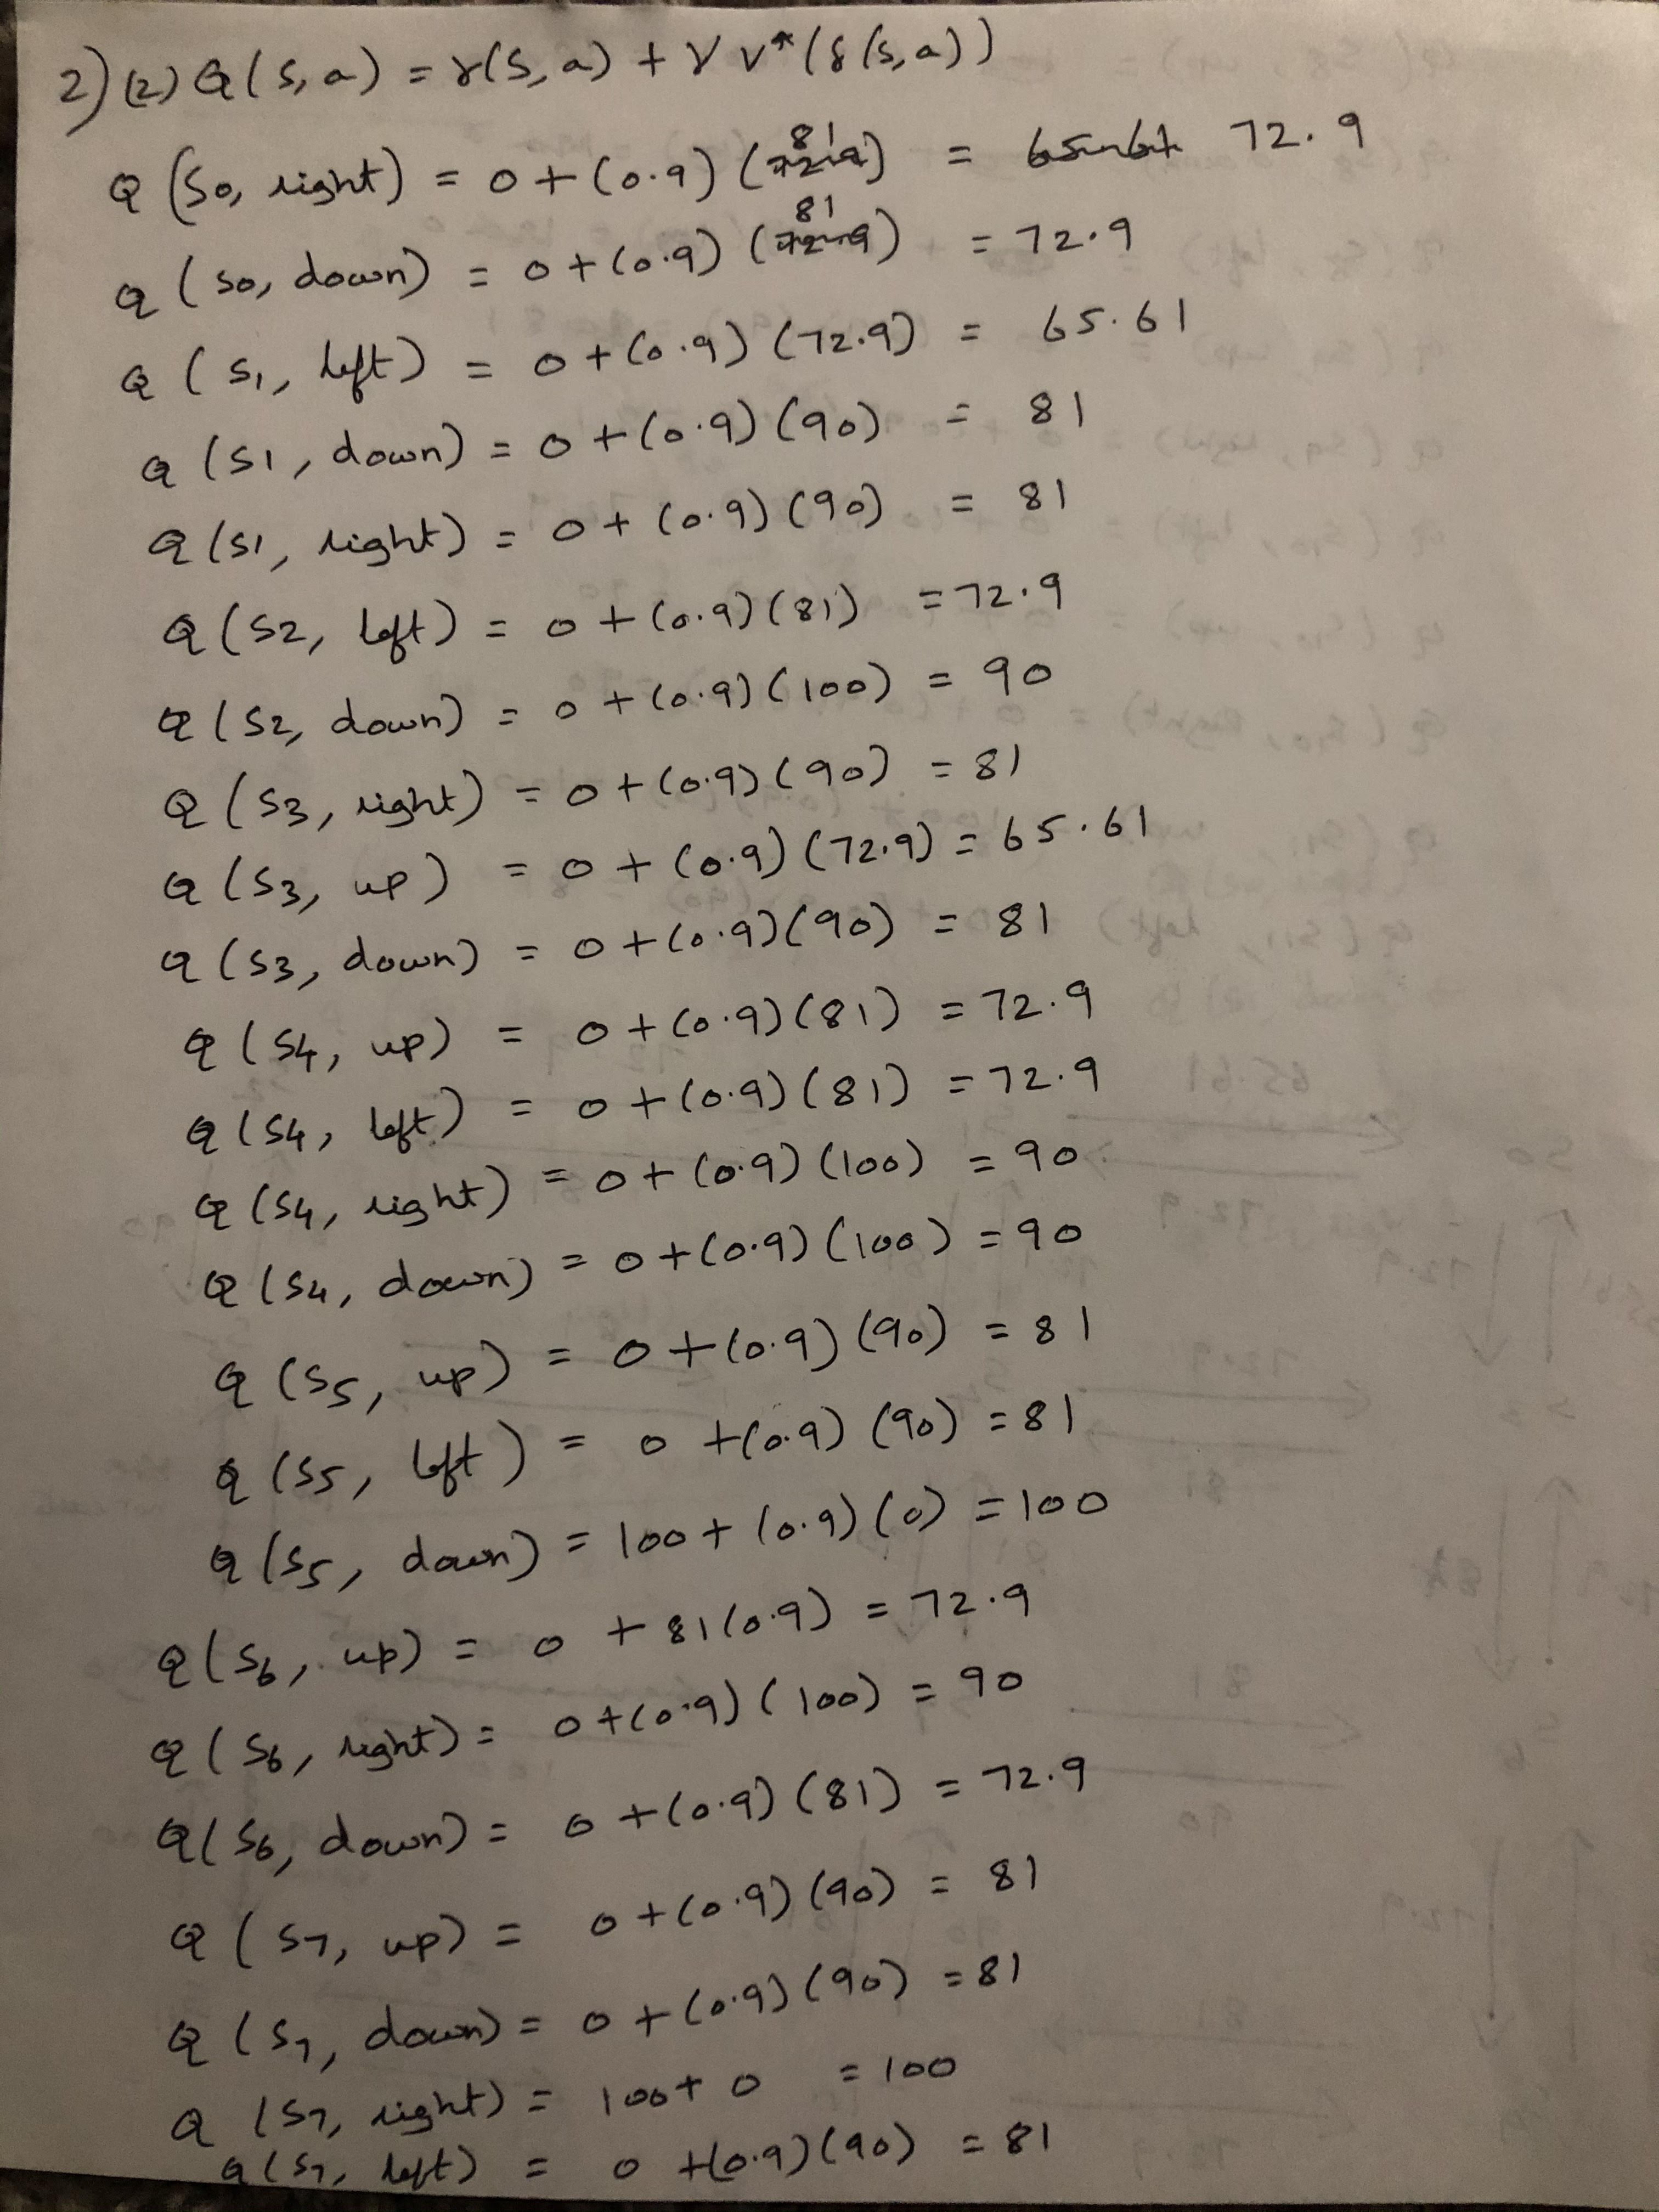**Answer**

(1)

(2)


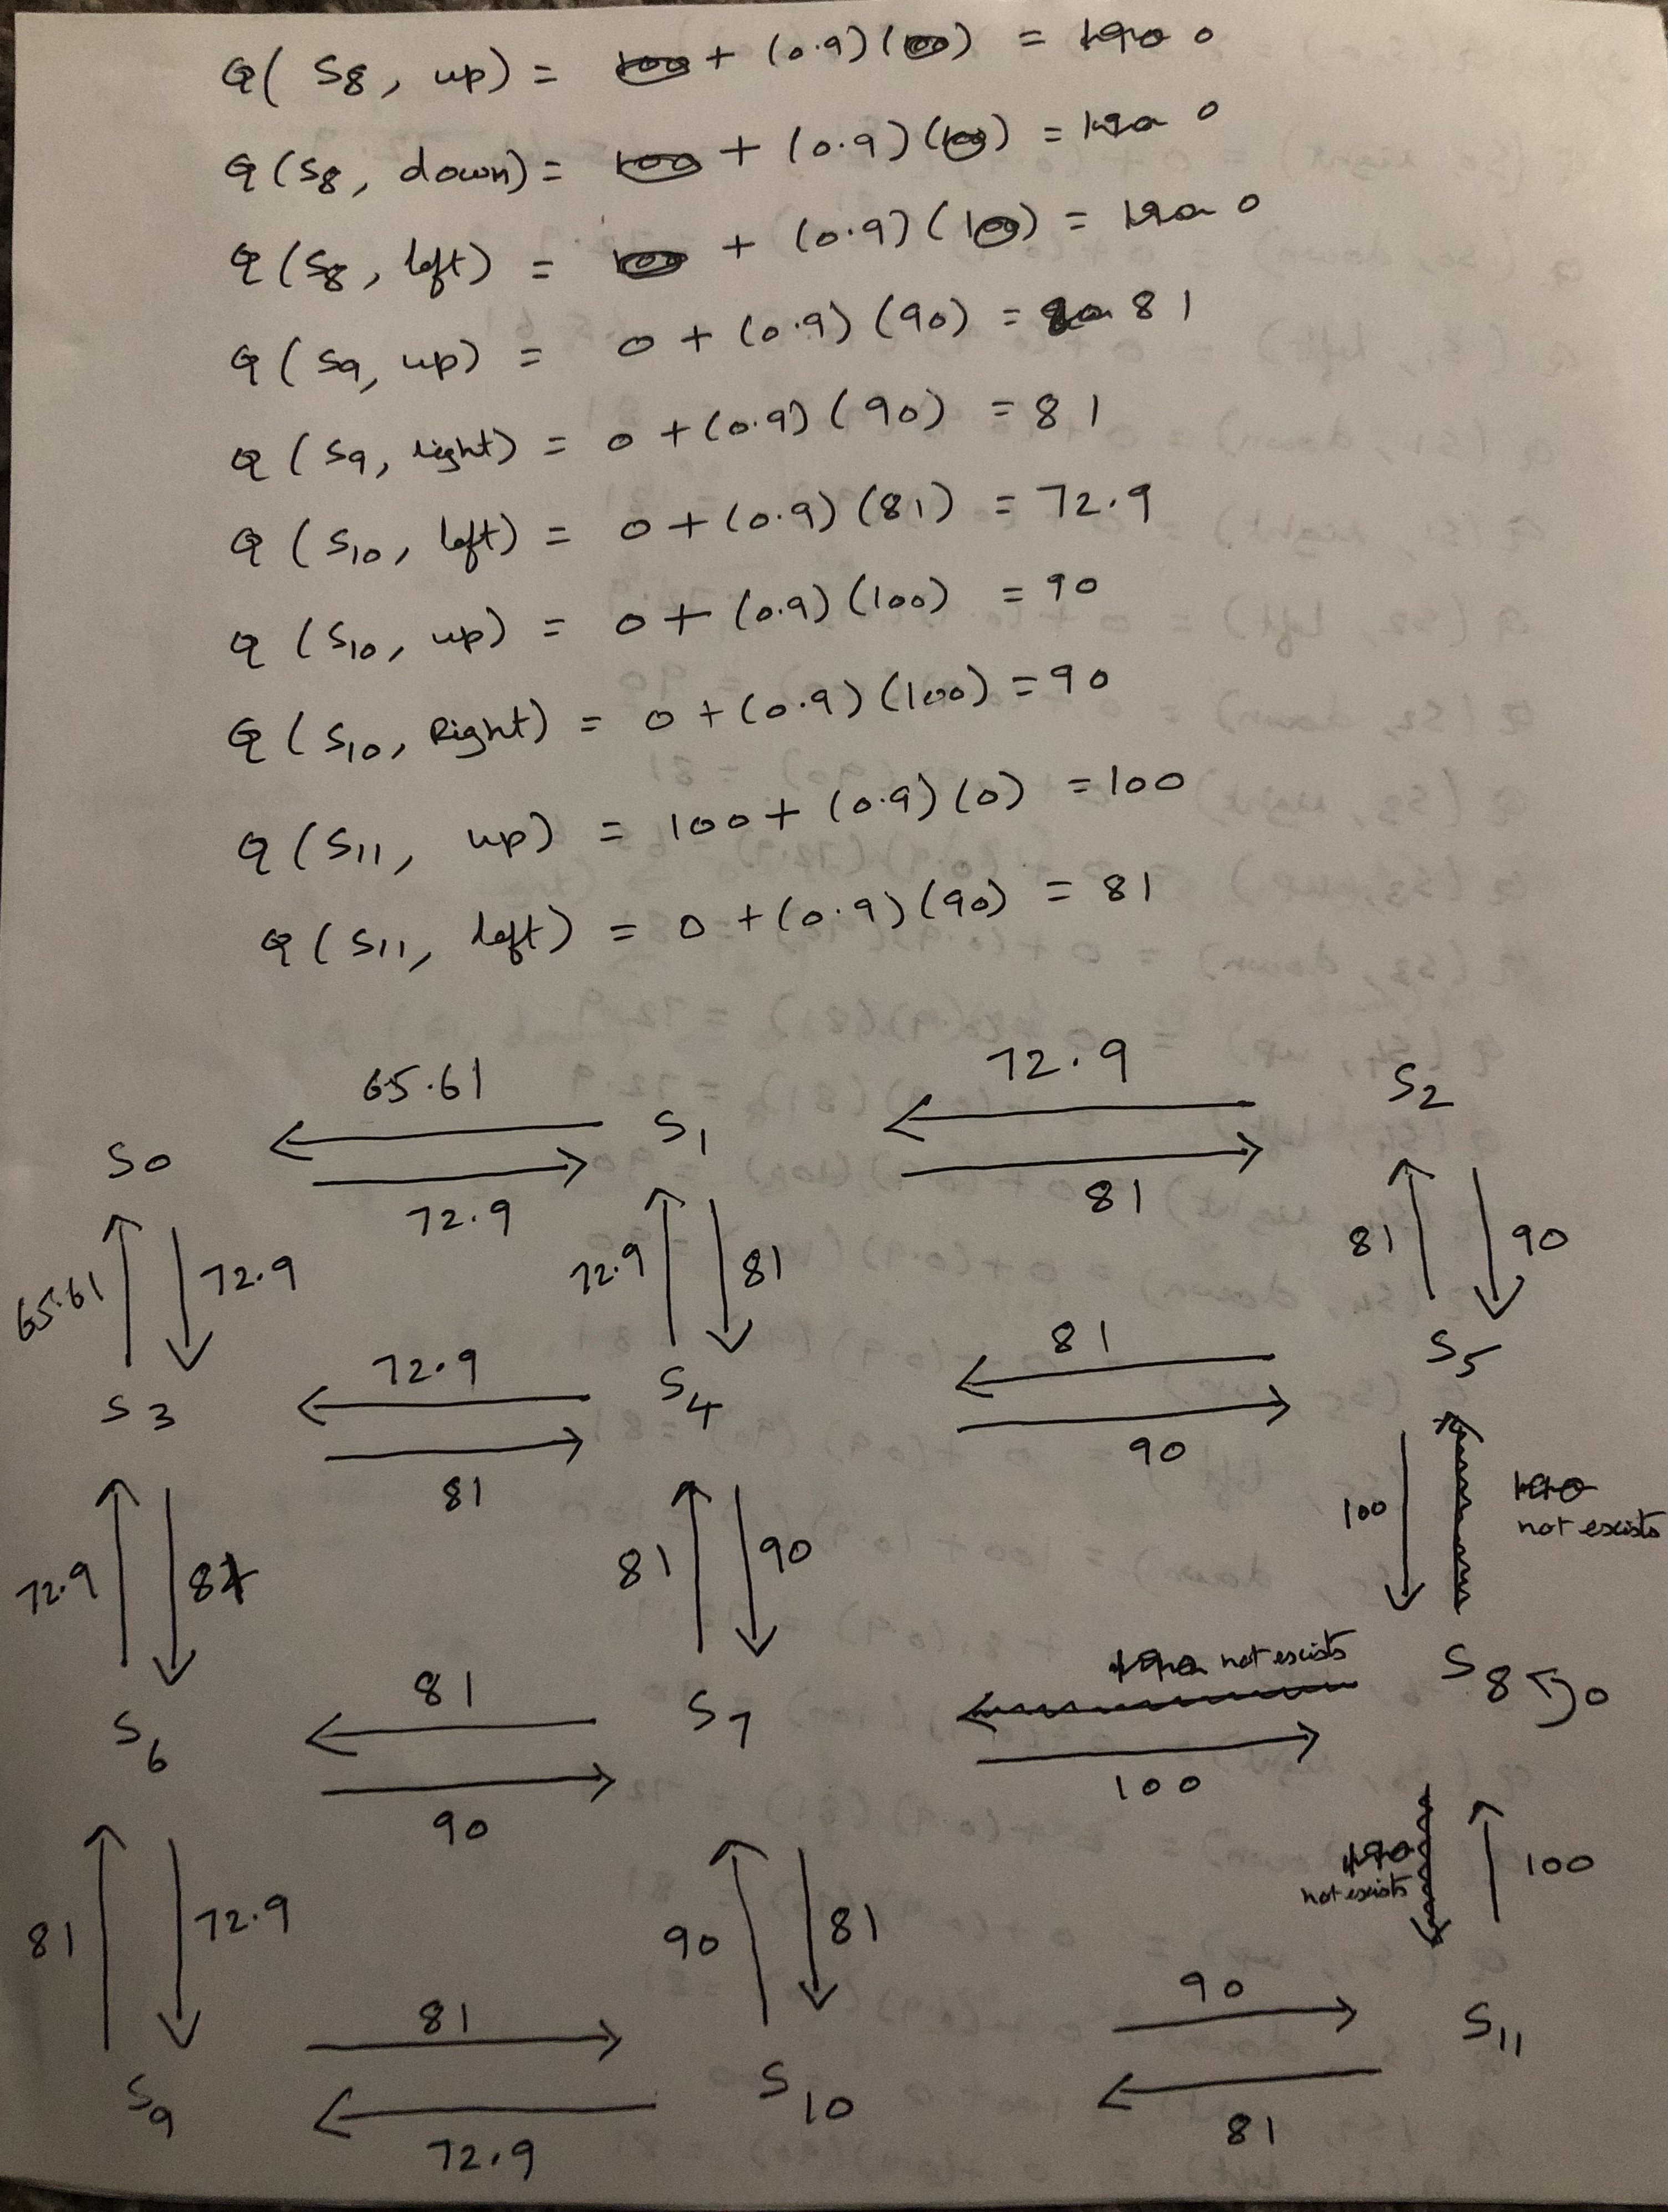

**Problem 3 (Program: 20 pts):**

Modify the fully functioning Q-learning algorithm in the code cell below, to learn the $Q(s,a)$ values for the above
example (Figure 1). Use the algorithm in slide04-rl.pdf, Page 22. Note: There are slight differences between the slide and the fully functioning code below. use the code below as the definitive reference. 

* You have to find out what stopping criterion to use. The code below shows a fixed number of iterations. Change it to something that measures convergence. For exmple, observe the sum of difference in the entire $Q$ table from step $n-1$ to step $n$: $\sum_{s,a \in S,A} | Q_n(s,a) - Q_{n-1}(s,a)|$, and stop when the difference drops below a certain level (try 0.01 first, and lower or raise it). You have to find this out empirically.
* Use a random policy to select action $a$ given current random state $s$ (note: this is also different from the slide). You will find that this can be achieved by just setting a certain simulation parameter.

(1) Directly modify the code below.

(2) Show resulting Q table ($12 \times 4$ matrix).

* Rows represent states and columns represent actions.
* Row ordering should be $s_0, s_1, s_2, ... , s_{11}$, from top to bottom.
* Column ordering should be $up, down, left, right$, from left to right. 
* **Note: do not change the above ordering! You will be penalized if you do so.**
* Set (s,a) of Q and other matrices to $-1$ to mark illegal moves. 

(3) Write a new function to compute the $V(s)$ values for all $s_0, s_1, ... , s_{11}$, from the resulting $Q(s,a)$ values. Print the $V(s)$ values in the layout of Figure 1. 

(4) Show a plot showing the running average of $\sum_{s,a \in S,A} | Q_{t+1}(s,a) - Q_t(s,a)|$ over the iterations.

(5) Compare the outcomes above with the V values and the Q table you manually calculated in problem 2.

*). Note: This problem is mostly an exercise of just changing the environment (state transition matrix, and the reward matrix, according to Figure 1). Most of the requirement above, including the Q-table print out, computing the running average of difference in Q over time, and the plotting of the running average are already in the code. Read the instructions at the top of the code cell below, and try running it with different parameters to get your self familiarized with the code. Then change the "Environment set up" section where it is marked with "modify". The only real code you need to write is to write the function for computing $V(s)$. 




Delta
     up  down  left  right
s0   -1     3    -1      1
s1   -1     4     0      2
s2   -1     5     1     -1
s3    0     6    -1      4
s4    1     7     3      5
s5    2     8     4     -1
s6    3     9    -1      7
s7    4    10     6      8
s8    8     8     8      8
s9    6    -1    -1     10
s10   7    -1     9     11
s11   8    -1    10     -1


Reward
      up  down  left  right
s0    -1     0    -1      0
s1    -1     0     0      0
s2    -1     0     0     -1
s3     0     0    -1      0
s4     0     0     0      0
s5     0   100     0     -1
s6     0     0    -1      0
s7     0     0     0    100
s8     0     0     0     -1
s9     0    -1    -1      0
s10    0    -1     0      0
s11  100    -1     0     -1


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0   -1.0
s3   0.0   0.0  -1.0    0.0
s4   0.0   0.0   0.0    0.0
s5   0.0   0.0   0.0   -1.0
s6   0.0   0.0  -1.0    0.0
s7   0.0   0.0   0.0    0.0
s8 

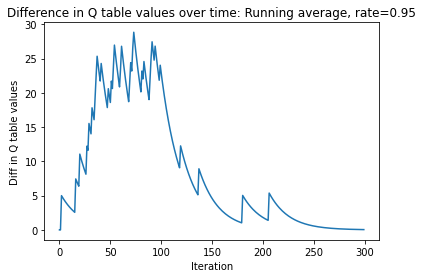

Running average
0.04557987358288722


In [102]:
#!/usr/bin/python

# qlearn.py : simple discrete, deterministic Q-learning 
#
# Requires: numpy, pandas, matplotlib
#
# Yoonsuck Choe
# choe@tamu.edu
#
# 2021. 02. 17. (wed) 09:00:58 KST
# 2021. 02. 18. (thu) 00:09:00 KST
#
# Getting started:
# 
# - pick between "console" mode (for command line) or "notebook" mode (for colab, etc). 
#     See the config section.
# 
#     mode  = "console"
#
# Suggested experiments:
#
# - change epsilon: 
#     0.1, 0.25, 0.5 (default), 0.8, 1.0 and see how the Q diff plot looks like (how fast 
#     learning converges.
#    
#     ./qlearn.pl --epsilon=0.25 
#
#     or, for notebook mode
# 
#     args.epsilon = 0.25
#     qlearn()
# 
# - change alpha: 
#     0.1, 0.25, 0.5, 0.8, 1.0 (default) and see how the Q diff plot looks like (how fast 
#     learning converges.
# 
#     ./qlearn.pl --alpha=0.25 
# 
#     or, for notebook mode
# 
#     args.alpha= 0.25
#     qlearn()
# 
# - try a new grid world environment (change section below "Environment set up".
#     search for "modify"
#
#

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode="console"
mode="notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="discount rate")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration?")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 1.0
    self.gamma = 0.9
    self.epsilon = 0.5
    self.num_iter = 300
    self.run_avg_rate = 0.95
    self.display_flag = "True"
  
    
#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of abs difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 (s2)
# s3 s4 s5 
# 
#   * (s1,right) and (s5,up) has reward 100, all others are 0.
#   * All actions in s2 lead back to s2, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5","s6","s7","s8","s9","s10","s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1,-1, -1, 0, 1, 2, 3, 4, 8, 6, 7, 8]),index=s_index),
	  "down" : pd.Series(np.array([ 3, 4, 5, 6, 7, 8, 9, 10, 8, -1, -1, -1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 1, -1, 3, 4, -1, 6, 8, -1, 9, 10]),index=s_index),
	  "right": pd.Series(np.array([ 1, 2, -1, 4, 5,-1, 7, 8, 8, 10, 11, -1,]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1, -1,  -1,  0,  0, 0, 0, 0, 0, 0, 0, 100]),index=s_index),
	  "down" : pd.Series(np.array([ 0,  0,  0, 0, 0, 100, 0, 0, 0, -1, -1, -1]),index=s_index),
	  "left" : pd.Series(np.array([-1,  0,  0, -1,  0,  0, -1, 0, 0, -1, 0, 0]),index=s_index),
	  "right": pd.Series(np.array([ 0, 0,  -1,  0,  0, -1, 0, 100, -1, 0, 0, -1]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 8

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------

def qlearn(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  
  run_avg = 0
  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 
   

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)
  
  for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a] = visits.iloc[s,a]+1

    alpha = args.alpha
    gamma = args.gamma
  
    # 3.1 find next state from (s,a)
  
    s_next = delta.iloc[s,a]
  
    # 3.2 update Q
  
    
    # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
    Q.iloc[s,a] = (1.0-alpha)*Q.iloc[s,a] + alpha*(reward.iloc[s,a] + gamma*Q.iloc[s_next,:].max())
    v=Q.max(axis=1)
  
  # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
  
    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
   


    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n))
      print(Q)
      print("diff = "+str(d[n]))

    if (n>50  and run_avg < 0.01):
 
        break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)
  
  print("\nFinal visit count table\n")
  print(visits)

  print("\nFinal V(S) value\n")
  print(v)
  
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d)
  plt.show()
  print('Running average')
  print(run_avg)


#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to "True" to see the changing Q table over time.
args.epsilon = 1.0
qlearn()

# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1. 



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0   -1.0
s3   0.0   0.0  -1.0    0.0
s4   0.0   0.0   0.0    0.0
s5   0.0   0.0   0.0   -1.0
s6   0.0   0.0  -1.0    0.0
s7   0.0   0.0   0.0    0.0
s8   0.0   0.0   0.0    0.0
s9   0.0  -1.0  -1.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

         up   down   left  right
s0    -1.00   72.9  -1.00    0.0
s1    -1.00   81.0  65.61    0.0
s2    -1.00   90.0  72.90   -1.0
s3    65.61   81.0  -1.00    0.0
s4    72.90    0.0  72.90   90.0
s5    81.00  100.0  81.00   -1.0
s6    72.90   72.9  -1.00   90.0
s7    81.00   81.0   0.00  100.0
s8     0.00    0.0   0.00    0.0
s9    81.00   -1.0  -1.00   81.0
s10   90.00   -1.0  72.90   90.0
s11  100.00   -1.0  81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    24    -1      1
s1   -1    16     4      0
s2   -1    14     2     -1
s3    8    20    -1      2
s4   12     0    

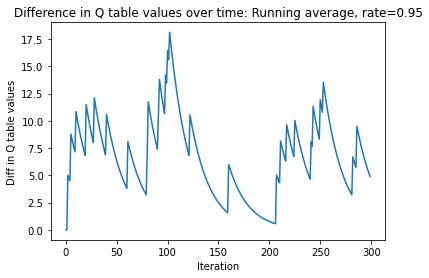

Running average
4.8817184517353684


In [103]:
# You can also easily run a different experiment in its own code cell, like below,
# with a different set of parameters

args.epsilon=0.3
qlearn()

**Answer:**

Modified Q table and V(s) table is shown above.

The actual running average is shown below the plot. when the epsilon value is 0.3 and above, the convergence occurs. when convergence occurs, The Q table and V(S) value looks same as the manually calculated table in the problem 2. experimented with other values as shown above. The actual running average time increases as the epsilon value decreases. for epsilon = 1.0, the running average time reaches 0.009 compared to the lesser epsilon value where the running average time in more. 


**Problem 4 (Program: 10 pts):**

Experiment with the $\epsilon$-greedy policy. You don't need to change any code. Just change the parameter and run qlearn(). 

Test with different $\epsilon$ values to see how the $\epsilon$-greedy policy behaves. For example, $\epsilon \in {0.0, 0.1, 0.3, 0.5, 0.8, 0.9, 1.0}$. Note: $\epsilon = 0.0$ is the greedy policy and $\epsilon = 1.0$ is the random policy. ($\epsilon$-greedy chooses the greedy move with $(1-\epsilon)$ probability.).

(1) Which $\epsilon$ value tend to converge fastest? For each $epsilon$ value, you can run multiple runs (say 5 times) and observe how long it too to converge, and take an average. You can then compare the average. 

(2) How does the number of visits table differ for different $\epsilon$ values? Based on this, how do you think $epsilon$ affects exploration vs. exploitation? 

(3) Did some $\epsilon$ value lead the algorithm not converging (the final Q table is different from the manually calculated table from Problem 2)? If so, why do you think it did not converge? 


**Answer**

Run your experiments in the code cell below. 

(1) When the epsilon is higher, it converges faster. As it explores more states in higher epsilon it understands the layout quicker. for epsilon=1.0, it converges faster at the run_avg of 0.009 while the running average is more for other values of epsilon when it converges. 

(2) The number of visits for lower epsilon values is less as it is mostly towards the start state and exploits success earlier. during training, the values like epsilon 0 gets stuck in the local minima.

For higher epsilon, the exploration is more. The visit is for multiple states randomly makes it explore more possibilities which is better for the algorithm to converge.

(3) for lower values like epsilon = 0.0, 0.1, 0.2 it does not converge as it gets stuck in the local minima and switching back and forth.




Delta
     up  down  left  right
s0   -1     3    -1      1
s1   -1     4     0      2
s2   -1     5     1     -1
s3    0     6    -1      4
s4    1     7     3      5
s5    2     8     4     -1
s6    3     9    -1      7
s7    4    10     6      8
s8    8     8     8      8
s9    6    -1    -1     10
s10   7    -1     9     11
s11   8    -1    10     -1


Reward
      up  down  left  right
s0    -1     0    -1      0
s1    -1     0     0      0
s2    -1     0     0     -1
s3     0     0    -1      0
s4     0     0     0      0
s5     0   100     0     -1
s6     0     0    -1      0
s7     0     0     0    100
s8     0     0     0     -1
s9     0    -1    -1      0
s10    0    -1     0      0
s11  100    -1     0     -1


Q: initial
           up      down      left     right
s0  -1.000000  0.000711 -1.000000  0.000779
s1  -1.000000  0.000980 -1.000000  0.000022
s2  -1.000000  0.000705  0.000962 -1.000000
s3  -1.000000  0.000975 -1.000000  0.000623
s4   0.000591  0.000750  0.000784  

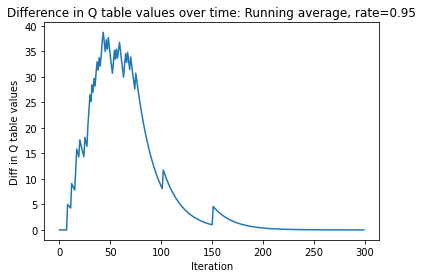

diff in Q reached below 0.01 at iteration = 271
Running average
0.009754428864447546


In [104]:

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode="console"
mode="notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="discount rate")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration?")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 1.0
    self.gamma = 0.9
    self.epsilon = 0.5
    self.num_iter = 300
    self.run_avg_rate = 0.95
    self.display_flag = "True"

#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of abs difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 (s2)
# s3 s4 s5 
# 
#   * (s1,right) and (s5,up) has reward 100, all others are 0.
#   * All actions in s2 lead back to s2, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5","s6","s7","s8","s9","s10","s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1,-1, -1, 0, 1, 2, 3, 4, 8, 6, 7, 8]),index=s_index),
	  "down" : pd.Series(np.array([ 3, 4, 5, 6, 7, 8, 9, 10, 8, -1, -1, -1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 1, -1, 3, 4, -1, 6, 8, -1, 9, 10]),index=s_index),
	  "right": pd.Series(np.array([ 1, 2, -1, 4, 5,-1, 7, 8, 8, 10, 11, -1,]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1, -1,  -1,  0,  0, 0, 0, 0, 0, 0, 0, 100]),index=s_index),
	  "down" : pd.Series(np.array([ 0,  0,  0, 0, 0, 100, 0, 0, 0, -1, -1, -1]),index=s_index),
	  "left" : pd.Series(np.array([-1,  0,  0, -1,  0,  0, -1, 0, 0, -1, 0, 0]),index=s_index),
	  "right": pd.Series(np.array([ 0, 0,  -1,  0,  0, -1, 0, 100, -1, 0, 0, -1]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 8

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------

def qlearn(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  
  run_avg = 0
  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>0).astype(float)-1.0 + (delta>0)*np.random.rand(12,4)*0.001
 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)
  
  for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a] = visits.iloc[s,a]+1

    alpha = args.alpha
    gamma = args.gamma
  
    # 3.1 find next state from (s,a)
  
    s_next = delta.iloc[s,a]
  
    # 3.2 update Q
  
    # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
    Q.iloc[s,a] = (1.0-alpha)*Q.iloc[s,a] + alpha*(reward.iloc[s,a] + gamma*Q.iloc[s_next,:].max())
  
  
    # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
  
    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
   


    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n))
      print(Q)
      print("diff = "+str(d[n]))

    if (n>50  and run_avg < 0.01):
 
        break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)
  
  print("\nFinal visit count table\n")
  print(visits)
  
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d)
  plt.show()

  print("diff in Q reached below 0.01 at iteration = "+str(n))
  print('Running average')
  print(run_avg)
#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to "True" to see the changing Q table over time.
args.epsilon = 1.0
qlearn()

# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1. 



Q: initial
           up      down      left     right
s0  -1.000000  0.000192 -1.000000  0.000723
s1  -1.000000  0.000082 -1.000000  0.000480
s2  -1.000000  0.000381  0.000069 -1.000000
s3  -1.000000  0.000152 -1.000000  0.000652
s4   0.000133  0.000030  0.000490  0.000294
s5   0.000675  0.000581  0.000972 -1.000000
s6   0.000726  0.000888 -1.000000  0.000416
s7   0.000583  0.000961  0.000262  0.000794
s8   0.000422  0.000667  0.000649  0.000721
s9   0.000409 -1.000000 -1.000000  0.000204
s10  0.000589 -1.000000  0.000372  0.000004
s11  0.000781 -1.000000  0.000337 -1.000000

Final Q table

             up        down      left       right
s0    -1.000000    0.000192 -1.000000   72.900473
s1    -1.000000    0.000082 -1.000000   81.000526
s2    -1.000000   90.000584  0.000069   -1.000000
s3    -1.000000    0.000152 -1.000000   81.000526
s4     0.000133    0.000030  0.000261   90.000584
s5     0.000343  100.000649  0.000357   -1.000000
s6     0.000322    0.000368 -1.000000   90.000584

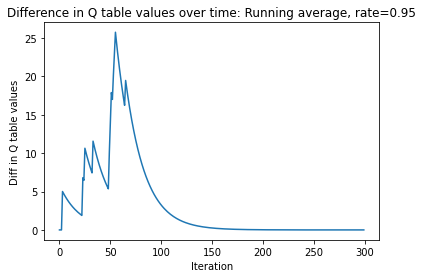

diff in Q reached below 0.01 at iteration = 213
Running average
0.009820020647916983


In [105]:
# You can quickly run multiple experiments without modifying the code above or copying and pasting the whole code. Just do something like this. Create a new code cell for a different experiment.

# Q=(delta>0).astype(float)-1.0 + (delta>0)*np.random.rand(6,4)*0.001   # add small initial random value to break the tie 
args.display_flag = "False"
args.epsilon = 0.0
qlearn()



Q: initial
           up      down      left     right
s0  -1.000000  0.000300 -1.000000  0.000623
s1  -1.000000  0.000062 -1.000000  0.000092
s2  -1.000000  0.000321  0.000349 -1.000000
s3  -1.000000  0.000676 -1.000000  0.000465
s4   0.000080  0.000214  0.000765  0.000042
s5   0.000978  0.000723  0.000852 -1.000000
s6   0.000945  0.000306 -1.000000  0.000090
s7   0.000625  0.000044  0.000842  0.000638
s8   0.000744  0.000702  0.000675  0.000070
s9   0.000077 -1.000000 -1.000000  0.000900
s10  0.000757 -1.000000  0.000666  0.000664
s11  0.000330 -1.000000  0.000007 -1.000000

Final Q table

             up        down       left       right
s0    -1.000000   72.900488  -1.000000    0.000283
s1    -1.000000    0.000062  -1.000000   81.000542
s2    -1.000000   90.000603   0.000578   -1.000000
s3     0.000452   81.000542  -1.000000    0.000393
s4    72.900488    0.000214  72.900488   90.000603
s5     0.000642  100.000670   0.000393   -1.000000
s6     0.000502   72.900488  -1.000000   9

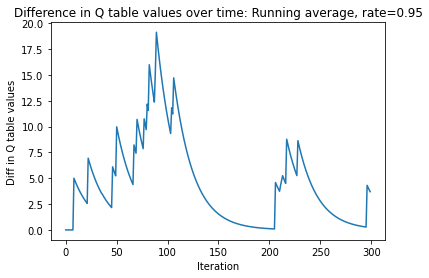

diff in Q reached below 0.01 at iteration = 299
Running average
3.6986957612122744


In [106]:
# You can quickly run multiple experiments without modifying the code above or copying and pasting the whole code. Just do something like this. Create a new code cell for a different experiment.

# Q=(delta>0).astype(float)-1.0 + (delta>0)*np.random.rand(6,4)*0.001   # add small initial random value to break the tie 
args.display_flag = "False"
args.epsilon = 0.1
qlearn()



Q: initial
           up      down      left     right
s0  -1.000000  0.000813 -1.000000  0.000337
s1  -1.000000  0.000806 -1.000000  0.000021
s2  -1.000000  0.000231  0.000703 -1.000000
s3  -1.000000  0.000414 -1.000000  0.000039
s4   0.000408  0.000663  0.000480  0.000252
s5   0.000181  0.000925  0.000340 -1.000000
s6   0.000156  0.000786 -1.000000  0.000030
s7   0.000541  0.000027  0.000283  0.000099
s8   0.000180  0.000704  0.000020  0.000050
s9   0.000557 -1.000000 -1.000000  0.000893
s10  0.000483 -1.000000  0.000152  0.000442
s11  0.000858 -1.000000  0.000183 -1.000000

Final Q table

             up        down       left       right
s0    -1.000000   72.900462  -1.000000   72.900462
s1    -1.000000   81.000513  65.610416   81.000513
s2    -1.000000   90.000570  72.900462   -1.000000
s3    65.610416   81.000513  -1.000000   81.000513
s4    72.900462   90.000570  72.900462   90.000570
s5    81.000513  100.000634  81.000513   -1.000000
s6    72.900462   72.900462  -1.000000   9

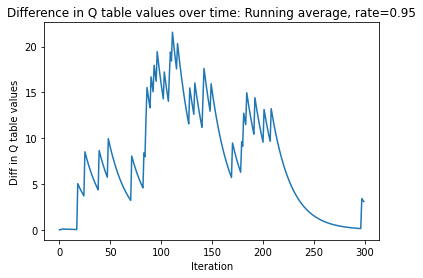

diff in Q reached below 0.01 at iteration = 299
Running average
3.0849268671054317


In [107]:
# You can quickly run multiple experiments without modifying the code above or copying and pasting the whole code. Just do something like this. Create a new code cell for a different experiment.

# Q=(delta>0).astype(float)-1.0 + (delta>0)*np.random.rand(6,4)*0.001   # add small initial random value to break the tie 
args.display_flag = "False"
args.epsilon = 0.3
qlearn()



Q: initial
           up      down      left         right
s0  -1.000000  0.000668 -1.000000  9.400980e-04
s1  -1.000000  0.000060 -1.000000  2.873063e-04
s2  -1.000000  0.000506  0.000441 -1.000000e+00
s3  -1.000000  0.000657 -1.000000  8.148199e-04
s4   0.000307  0.000581  0.000818  7.985950e-04
s5   0.000473  0.000203  0.000622 -1.000000e+00
s6   0.000581  0.000935 -1.000000  7.152019e-04
s7   0.000987  0.000628  0.000593  7.714263e-04
s8   0.000779  0.000056  0.000780  5.866809e-07
s9   0.000841 -1.000000 -1.000000  4.131201e-04
s10  0.000550 -1.000000  0.000498  8.951118e-04
s11  0.000480 -1.000000  0.000134 -1.000000e+00

Final Q table

             up        down       left         right
s0    -1.000000   72.900512  -1.000000  7.290051e+01
s1    -1.000000   81.000569  65.610461  8.100057e+01
s2    -1.000000   90.000632  72.900512 -1.000000e+00
s3    65.610461   81.000569  -1.000000  8.100057e+01
s4    72.900512   90.000632  72.900512  9.000063e+01
s5    81.000569  100.000702  

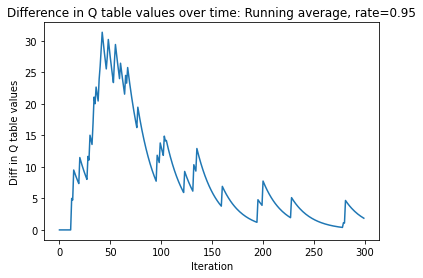

diff in Q reached below 0.01 at iteration = 299
Running average
1.8580276582883717


In [108]:
# You can quickly run multiple experiments without modifying the code above or copying and pasting the whole code. Just do something like this. Create a new code cell for a different experiment.

# Q=(delta>0).astype(float)-1.0 + (delta>0)*np.random.rand(6,4)*0.001   # add small initial random value to break the tie 
args.display_flag = "False"
args.epsilon = 0.5
qlearn()



Q: initial
           up      down      left     right
s0  -1.000000  0.000740 -1.000000  0.000418
s1  -1.000000  0.000221 -1.000000  0.000947
s2  -1.000000  0.000027  0.000678 -1.000000
s3  -1.000000  0.000712 -1.000000  0.000321
s4   0.000437  0.000690  0.000156  0.000737
s5   0.000360  0.000298  0.000611 -1.000000
s6   0.000113  0.000641 -1.000000  0.000833
s7   0.000573  0.000158  0.000330  0.000957
s8   0.000614  0.000342  0.000548  0.000560
s9   0.000878 -1.000000 -1.000000  0.000232
s10  0.000783 -1.000000  0.000031  0.000393
s11  0.000359 -1.000000  0.000224 -1.000000

Final Q table

             up        down       left       right
s0    -1.000000   72.900403  -1.000000   72.900403
s1    -1.000000   81.000448  65.610363   81.000448
s2    -1.000000   90.000498  72.900403   -1.000000
s3    65.610363   81.000448  -1.000000   81.000448
s4    72.900403   90.000498   0.000641   90.000498
s5    81.000448  100.000553  81.000448   -1.000000
s6    72.900403   72.900403  -1.000000   9

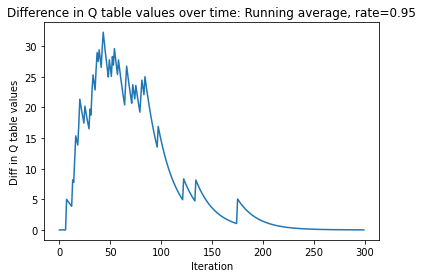

diff in Q reached below 0.01 at iteration = 297
Running average
0.009662912932564407


In [109]:
# You can quickly run multiple experiments without modifying the code above or copying and pasting the whole code. Just do something like this. Create a new code cell for a different experiment.

# Q=(delta>0).astype(float)-1.0 + (delta>0)*np.random.rand(6,4)*0.001   # add small initial random value to break the tie 
args.display_flag = "False"
args.epsilon = 0.8
qlearn()



Q: initial
           up      down      left     right
s0  -1.000000  0.000828 -1.000000  0.000928
s1  -1.000000  0.000317 -1.000000  0.000261
s2  -1.000000  0.000703  0.000268 -1.000000
s3  -1.000000  0.000110 -1.000000  0.000479
s4   0.000174  0.000449  0.000277  0.000268
s5   0.000567  0.000200  0.000071 -1.000000
s6   0.000710  0.000260 -1.000000  0.000534
s7   0.000636  0.000362  0.000118  0.000938
s8   0.000067  0.000202  0.000999  0.000094
s9   0.000931 -1.000000 -1.000000  0.000250
s10  0.000337 -1.000000  0.000520  0.000683
s11  0.000747 -1.000000  0.000877 -1.000000

Final Q table

             up        down       left       right
s0    -1.000000   72.900655  -1.000000   72.900655
s1    -1.000000   81.000728  65.610590   81.000728
s2    -1.000000   90.000809  72.900655   -1.000000
s3    65.610590   81.000728  -1.000000   81.000728
s4    72.900655   90.000809  72.900655   90.000809
s5    81.000728  100.000899  81.000728   -1.000000
s6    72.900655   72.900655  -1.000000   9

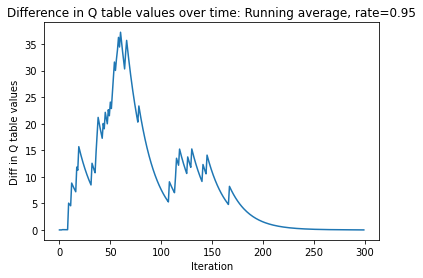

diff in Q reached below 0.01 at iteration = 298
Running average
0.009899349928055577


In [110]:
# You can quickly run multiple experiments without modifying the code above or copying and pasting the whole code. Just do something like this. Create a new code cell for a different experiment.

# Q=(delta>0).astype(float)-1.0 + (delta>0)*np.random.rand(6,4)*0.001   # add small initial random value to break the tie 
args.display_flag = "False"
args.epsilon = 0.9
qlearn()



Q: initial
           up      down      left     right
s0  -1.000000  0.000899 -1.000000  0.000771
s1  -1.000000  0.000309 -1.000000  0.000021
s2  -1.000000  0.000428  0.000327 -1.000000
s3  -1.000000  0.000201 -1.000000  0.000607
s4   0.000322  0.000508  0.000972  0.000312
s5   0.000560  0.000336  0.000280 -1.000000
s6   0.000992  0.000057 -1.000000  0.000098
s7   0.000178  0.000030  0.000467  0.000619
s8   0.000855  0.000720  0.000870  0.000523
s9   0.000629 -1.000000 -1.000000  0.000210
s10  0.000874 -1.000000  0.000505  0.000038
s11  0.000865 -1.000000  0.000952 -1.000000

Final Q table

             up        down       left       right
s0    -1.000000   72.900571  -1.000000   72.900571
s1    -1.000000   81.000634  65.610514   81.000634
s2    -1.000000   90.000704  72.900571   -1.000000
s3    65.610514   81.000634  -1.000000   81.000634
s4    72.900571   90.000704  72.900571   90.000704
s5    81.000634  100.000783  81.000634   -1.000000
s6    72.900571   72.900571  -1.000000   9

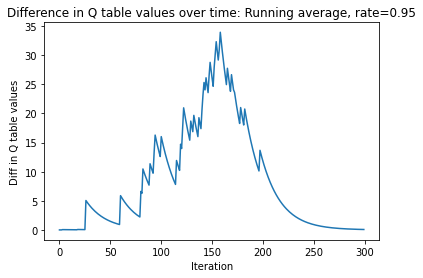

diff in Q reached below 0.01 at iteration = 299
Running average
0.0730229573310921


In [111]:
# You can quickly run multiple experiments without modifying the code above or copying and pasting the whole code. Just do something like this. Create a new code cell for a different experiment.

# Q=(delta>0).astype(float)-1.0 + (delta>0)*np.random.rand(6,4)*0.001   # add small initial random value to break the tie 
args.display_flag = "False"
args.epsilon = 1.0
qlearn()

**Problem 5 (Programming: 10)**

Copy and paste the code in Problem 3, and change it to implement SARSA($\lambda$). You have to make sure you implement the eligibility trace correctly. 

Once you're done implementing, run a few experiments to determine whether the original Q learning in Problem 3 works faster, or if the SARSA($\lambda$) algorithm works faster (faster to converge, given the same parameter conditions). The results my vary. Please write a detailed description of you experiment and results, and whether you find the more sophisticated SARSA($\lambda$) to be faster to converge. 




Delta
     up  down  left  right
s0   -1     3    -1      1
s1   -1     4     0      2
s2   -1     5     1     -1
s3    0     6    -1      4
s4    1     7     3      5
s5    2     8     4     -1
s6    3     9    -1      7
s7    4    10     6      8
s8    5     8     8      8
s9    6    -1    -1     10
s10   7    -1     9     11
s11   8    -1    10     -1


Reward
      up  down  left  right
s0    -1     0    -1      0
s1    -1     0     0      0
s2    -1     0     0     -1
s3     0     0    -1      0
s4     0     0     0      0
s5     0   100     0     -1
s6     0     0    -1      0
s7     0     0     0    100
s8     0     0     0      0
s9     0    -1    -1      0
s10    0    -1     0      0
s11  100    -1     0     -1


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0   -1.0
s3   0.0   0.0  -1.0    0.0
s4   0.0   0.0   0.0    0.0
s5   0.0   0.0   0.0   -1.0
s6   0.0   0.0  -1.0    0.0
s7   0.0   0.0   0.0    0.0
s8 

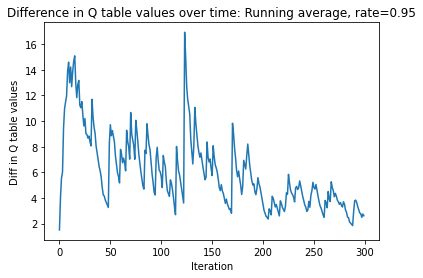

Running average
2.603474441071264
diff in Q reached below0.5  at iteration = 299
 Values of V
s0      66.799674
s1      68.668964
s2      87.621150
s3      76.232476
s4      87.958681
s5     100.000000
s6      65.487196
s7      99.960902
s8       0.000000
s9      80.340945
s10     88.001547
s11    100.000000
dtype: float64


In [112]:
#!/usr/bin/python

# qlearn.py : simple discrete, deterministic Q-learning 
#
# Requires: numpy, pandas, matplotlib
#
# Yoonsuck Choe
# choe@tamu.edu
#
# 2021. 02. 17. (wed) 09:00:58 KST
# 2021. 02. 18. (thu) 00:09:00 KST
#
# Getting started:
# 
# - pick between "console" mode (for command line) or "notebook" mode (for colab, etc). 
#     See the config section.
# 
#     mode  = "console"
#
# Suggested experiments:
#
# - change epsilon: 
#     0.1, 0.25, 0.5 (default), 0.8, 1.0 and see how the Q diff plot looks like (how fast 
#     learning converges.
#    
#     ./qlearn.pl --epsilon=0.25 
#
#     or, for notebook mode
# 
#     args.epsilon = 0.25
#     qlearn()
# 
# - change alpha: 
#     0.1, 0.25, 0.5, 0.8, 1.0 (default) and see how the Q diff plot looks like (how fast 
#     learning converges.
# 
#     ./qlearn.pl --alpha=0.25 
# 
#     or, for notebook mode
# 
#     args.alpha= 0.25
#     qlearn()
# 
# - try a new grid world environment (change section below "Environment set up".
#     search for "modify"
#
#

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode="console"
mode="notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="discount rate")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration?")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 0.3
    self.gamma = 0.9
    self.epsilon = 0.3
    self.num_iter = 300
    self.run_avg_rate = 0.95
    self.display_flag = "True"
    self.stopping_criteria = 0.5
    self.lambda_val = 0.9


#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of abs difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 (s2)
# s3 s4 s5 
# 
#   * (s1,right) and (s5,up) has reward 100, all others are 0.
#   * All actions in s2 lead back to s2, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5" , "s6" , "s7" , "s8" , "s9", "s10", "s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1, -1, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]),index=s_index),
	  "down" : pd.Series(np.array([ 3, 4, 5, 6, 7, 8, 9, 10, 8, -1, -1, -1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 1, -1, 3, 4, -1 , 6, 8, -1, 9, 10]),index=s_index),
	  "right": pd.Series(np.array([1, 2, -1, 4, 5, -1 ,7, 8, 8, 10, 11, -1]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1,-1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 100]),index=s_index),
	  "down" : pd.Series(np.array([ 0, 0, 0, 0, 0, 100, 0, 0, 0, -1, -1, -1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 0, -1, 0, 0, -1, 0, 0, -1, 0, 0]),index=s_index),
	  "right": pd.Series(np.array([ 0, 0, -1, 0, 0, -1, 0, 100, 0, 0, 0,-1]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 8

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------

#def v_state():

  
def qlearn(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  
  run_avg = 0

  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #e_t = pd.DataFrame(np.zeros(shape = (len(s_index) , num_actions)) , columns = ["up" , "down" , "left", "right"], index = s_index)
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)
  
  for n in range(args.num_iter):
    e_t = pd.DataFrame(np.zeros(shape = (len(s_index) , num_actions)) , columns = ["up" , "down" , "left", "right"], index = s_index)
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    #----------
    # 3. train
    #----------


    
  
    visits.iloc[s,a] = visits.iloc[s,a]+1

    alpha = args.alpha
    gamma = args.gamma
    lambda_val = args.lambda_val
    # 3.1 find next state from (s,a)
    while s!= goal:
      s_next = delta.iloc[s,a]

      #----------
      # 2. a : choose action (epsilon greedy policy)
      #----------
  
      if (random.random() < (1-args.epsilon)):
  
          # greedy action:
          a_next = Q.iloc[s_next,:].argmax()
  
      else:
  
          # random action
          a_next = random.randint(0,num_actions-1)
  
          while (delta.iloc[s_next,a_next]==-1): # avoid invalid action
            a_next = random.randint(0,num_actions-1)



      
      # 3.2 update Q
      delta_val = reward.iloc[s,a] + (gamma * Q.iloc[s_next, a_next]) - Q.iloc[s,a]
      e_t.iloc[s,a] = 1

      Q = Q + (alpha * delta_val * e_t)
      e_t = gamma * lambda_val * e_t
  
      # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
      # Q.iloc[s,a] = (1.0-alpha)Q.iloc[s,a] + alpha(reward.iloc[s,a] + gamma*Q.iloc[s_next,:].max())
  
  
      # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
  
      d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
      run_avg = d[n]
      old_Q = Q.copy(deep=True)

      s = s_next
      a = a_next
   


      # 3.3 print current Q and running average of Q diff.
  
      if (args.display_flag == "True"):
  
        print("\nQ : iter="+str(n))
        print(Q)
        print("diff = "+str(d[n]))

      if (n>75  and run_avg < args.stopping_criteria):
 
          break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)

  
  print("\nFinal visit count table\n")
  print(visits)
  
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d)
  plt.show()
  print('Running average')
  print(run_avg)

  print("diff in Q reached below" + str(args.stopping_criteria) +"  at iteration = "+str(n))

  v_values = Q.max(axis = 1)
  print(" Values of V")
  print(v_values)  

#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to "True" to see the changing Q table over time.
args.epsilon = 0.3
qlearn()


# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1.

**Answer**

Depending on the eligibility trace value, update is done for all state action pairs. More cells in Q table are updated for every move. This way, the SARSA is faster to converge than the original Q learning in problem 3. for epsilon = 0.3 where convergence occurs in problem 3, the same epsilon value is set in this problem but the convergence occurs faster comparitively. Run_avg is also calculated (by running approx 5 times) and by comparing it is found that SARSA performes faster.


# Section II. Stochastic Case (total 40 points)

Consider a stochastic version of the reinforcement learning problem posed in Section 1 (figure copie below). Modify the rules so that:

* $\delta(s,a)$ is stochastic: The probability of landing in the intended direction is $0.70$. The probability of landing in one of $n$ unintended legal direction is $\frac{0.30}{n}$.

  * Example 1 : If you are in $s_0$ and action $a$ was $right$, probability of landing in $s_1$ is 0.70, and ending up in $s_3$ u=is 0.3.

  * Example 2: If you are in $s_1$ and $a$ was $down$, probability of landing in $s_4$ is 0.70, ending up in $s_0$ is 0.15 (= 0.3/2), and ending up in $s_2$ is 0.15 (= 0.3/2).

  * Example 3: If you are in $s_4$ and $a$ was $left$, probability of landing in $s_3$ is 0.70, ending up in $s_1$ is 0.1 (= 0.3/3), ending up in $s_5$ is 0.1 (= 0.3/3), and ending up in $s_7$ is 0.1 (= 0.3/3)

* Reward $r(s,a)$ depends on where you landed based on the above. All rewards are 0 unless the resulting state was the goal state $s_8$. For example, if you were in $s_7$ and the action was $a=up$, with 10\% chance you will land in $s_8$, the goal state. In this case $r(s_7, up) = 100$ for that specific run. In a different run, with the same action $up$, if you landed in $s_{10}$, then $r(s_7,up) = 0$. Note that $r(s_7,up)$ can be either 0 or 100, depending on the random outcome.

<figure>
<center>
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy" height="450px"> &nbsp;&nbsp;&nbsp; &nbsp;<img 
 src="https://drive.google.com/uc?export=view&id=1aGu78DvllvjaDghW7fzNK7uOPeBmebyN" height="450px"> 
<figcaption>Figure 2: Left = same as Figure 1, Right = stochastic behavior </figcaption></center>
</figure>





**Problem 7 (Written: 10 pts):**

Compute $E[r(s_7,up)]$ by hand, given the above info (Figure 2, and the description).

$E[\cdot]$ is the expected value operator. $E[X] = \sum_{i=0}^n x_i p_i $, where $X$ is a random variable, $x_i$ ($i=0 .. n$) is a value $X$ can take, and $p_i$ is the probability of observing $x_i$.  

So, to compute $E[r(s_7,up)]$, you need to find all possible reward values ($x_i$) and their probabilities ($p_i$), then plug it into the above equation. See Figure 2 (right) to find these values.






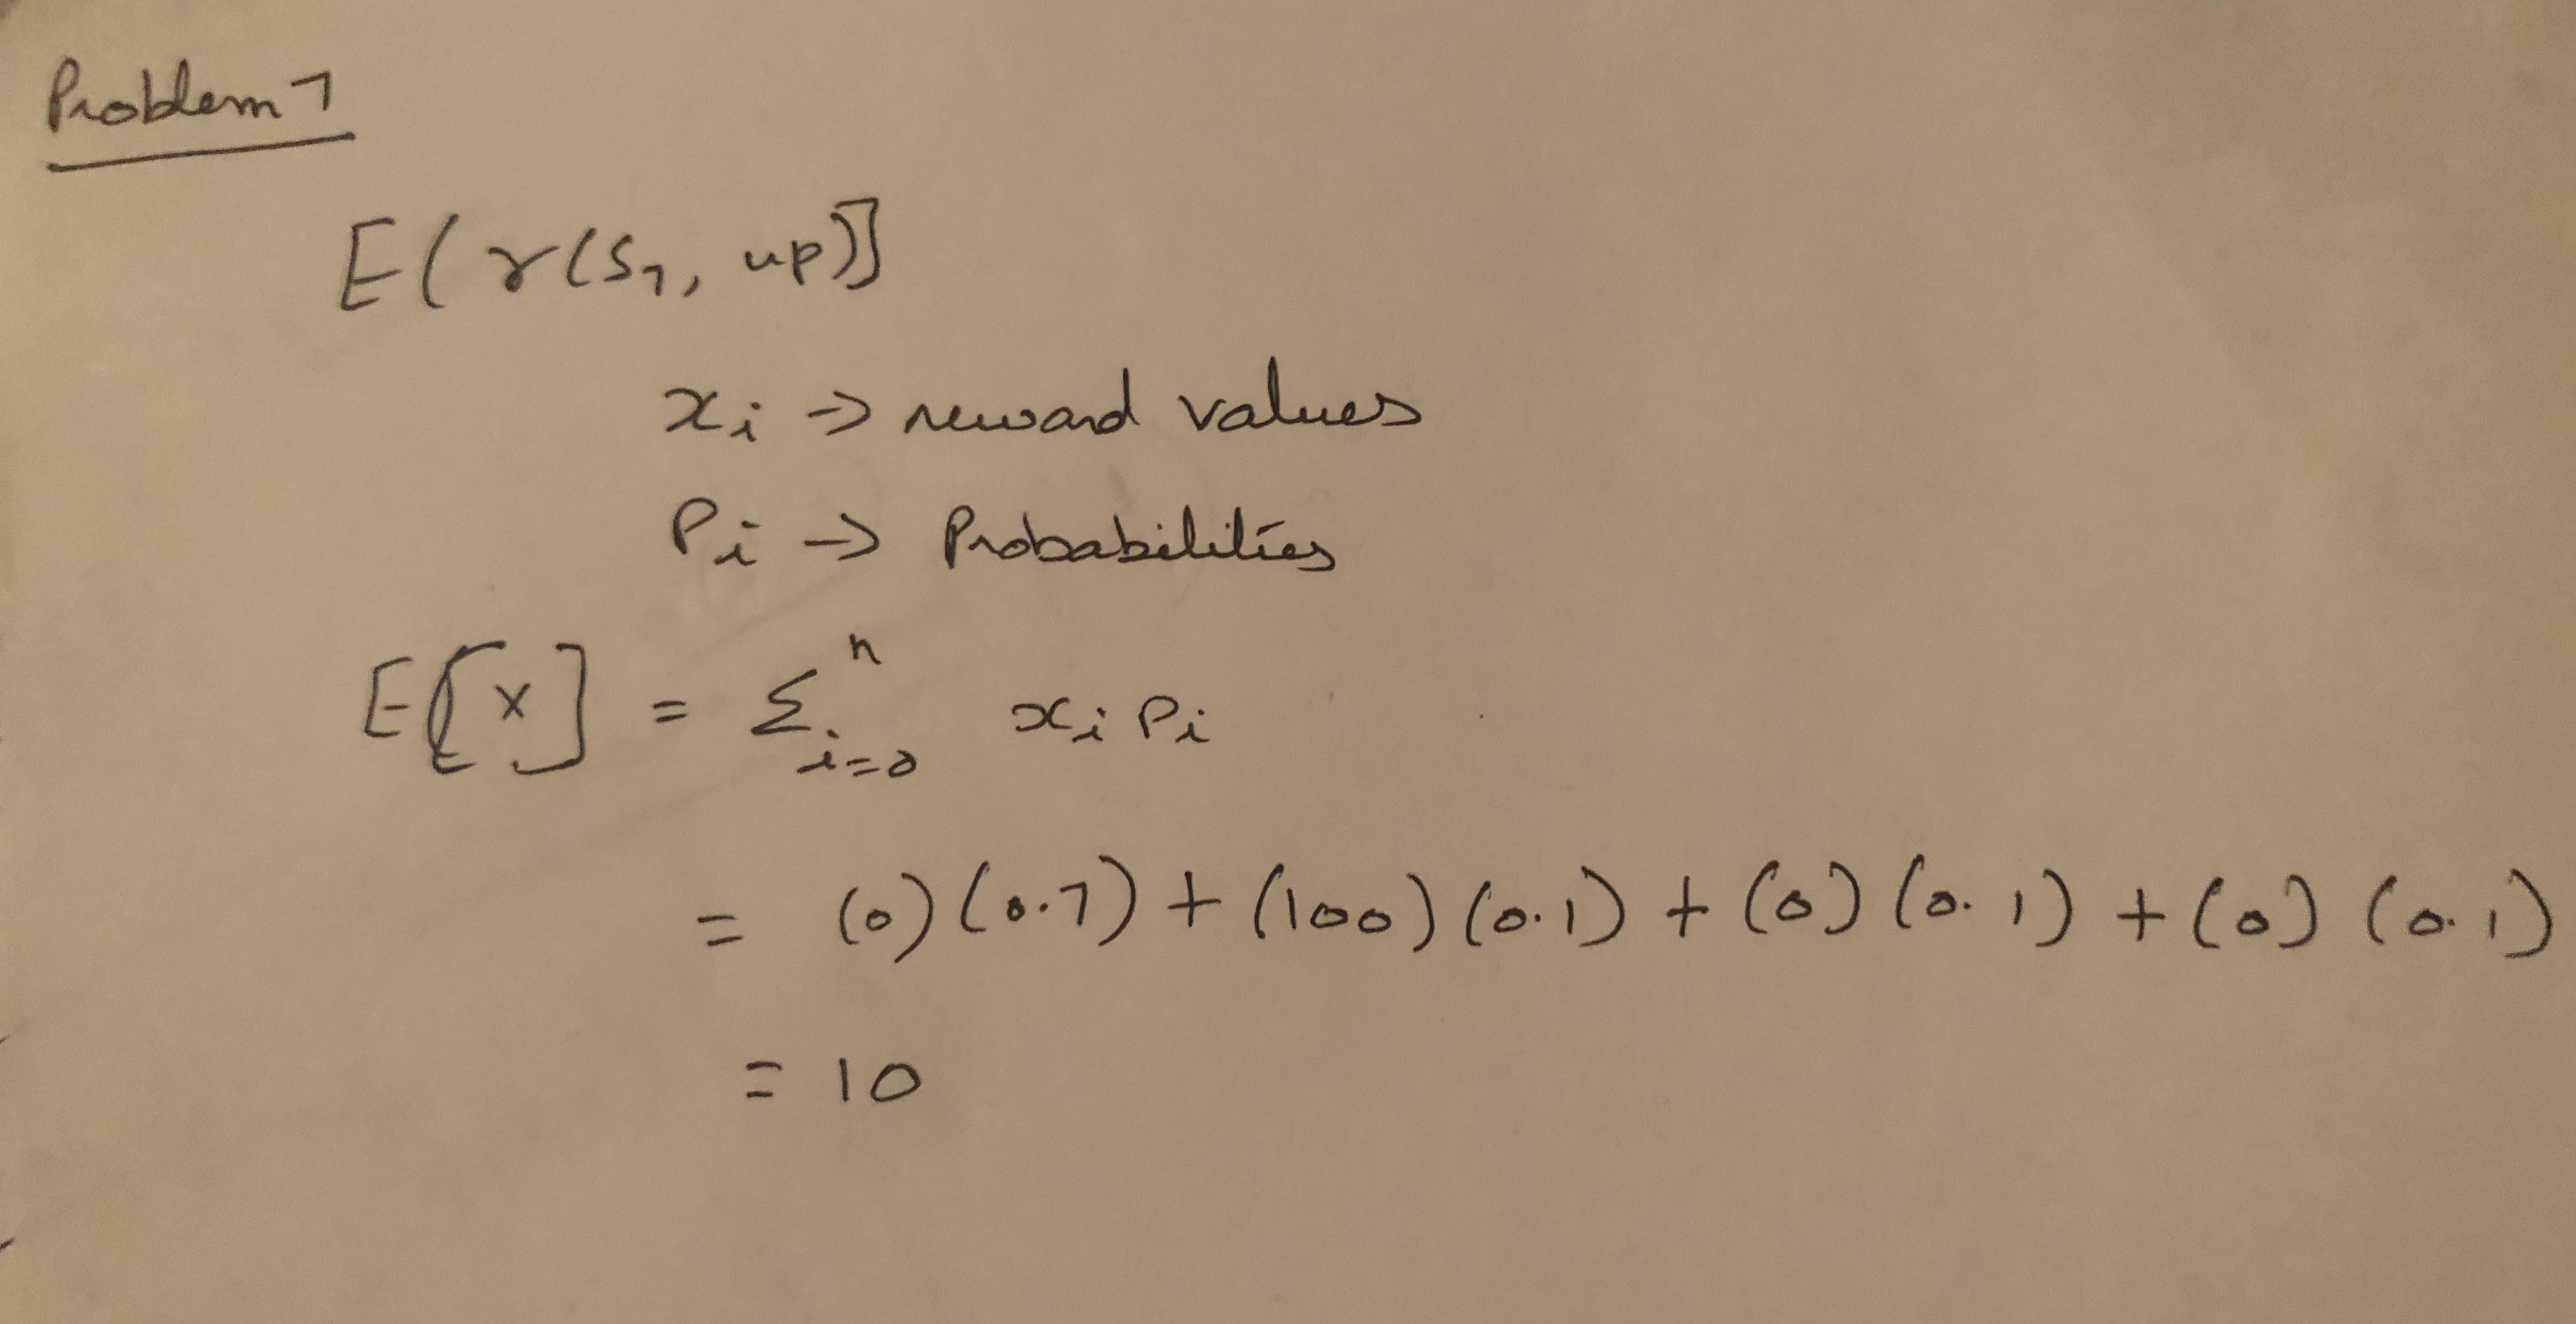**Answer**:


**Problem 8 (Program: 20 pts):**

Modify the program in problem 3, so that the environment acts stochastically, as defined in Problem 5. 

The learning rule has to be modified to the one shown in slide04-rl.pdf, page 35. 

> $\hat{Q}_n(s,a) \leftarrow (1-\alpha_n) \hat{Q}_{n-1}(s,a) + \alpha_n \left[ r + \gamma \max_{a'} \hat{Q}_{n-1}(s',a') \right],$ 
> 
> where $\alpha_n = \frac{1}{1+visits_s(s,a)}$

(1) Modify the code from problem 3.

(2) Run the experiment, and show the resulting $Q$ table. You should experiment with the $\alpha$ parameter to get the correct result. Use the random policy. $\gamma = 0.9$, as usual.  

(3) Set up another table Sum_Ersa to compute the sum of all reward you observed when visiting the $(s,a)$ pairs. This table should be the same size as the Q table. When a specific state action pair is visited ($(s,a)$ is "visited", when $s$ and $a$ are randomly generated in the main loop, to update $Q(s,a)$), say $(s_4, right)$, observe the reward ($r$), and add it to the appropriate Sum_Ersa location:
```
Sum_Ersa.iloc[5,3] = r + Sum_Ersa.iloc[5,3]    # Note: (index of s4 is 5, and index of right is 3)
```
or
```
Sum_Ersa.loc["s4","right"] = r + Sum_Ersa.loc["s4","right"]    # Using loc, instead of iloc.
```
Finally, after your training terminates, compute an estimate of $E[r(s,a)]$, based on the Sum_Ersa  table and the visits table (this visits table is already implemented). 

> $E[r(s,a)] \sim \frac{\sum_{\forall \mbox{visits to } (s,a)} (\mbox{observed  reward }, r)}{\mbox{visits}(s,a)}$

Store the results in a table named:
```
Ersa
```

Print out the results.

(4) Compare $E[r(s_7,up)]$ with the manually computed value from Problem 7. Are they comparable?


**Answer:**

(1) Modified code along with Q equation and alpha is given below.

(2) random policy gamma=0.9 is used to produce Q table as below.

(3) Table sum_ersa is calculated and Ersa table is calculated and printed as below

(4) The E(r(s7, up)) calculated manually equals approximately to the corresponding value in the Ersa table here. (sometimes running the code again gives the approximate value).





Delta
     up  down  left  right
s0   -1     3    -1      1
s1   -1     4     0      2
s2   -1     5     1     -1
s3    0     6    -1      4
s4    1     7     3      5
s5    2     8     4     -1
s6    3     9    -1      7
s7    4    10     6      8
s8    5     8     8      8
s9    6    -1    -1     10
s10   7    -1     9     11
s11   8    -1    10     -1


Reward
      up  down  left  right
s0    -1     0    -1      0
s1    -1     0     0      0
s2    -1     0     0     -1
s3     0     0    -1      0
s4     0     0     0      0
s5     0   100     0     -1
s6     0     0    -1      0
s7     0     0     0    100
s8     0     0     0      0
s9     0    -1    -1      0
s10    0    -1     0      0
s11  100    -1     0     -1


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0   -1.0
s3   0.0   0.0  -1.0    0.0
s4   0.0   0.0   0.0    0.0
s5   0.0   0.0   0.0   -1.0
s6   0.0   0.0  -1.0    0.0
s7   0.0   0.0   0.0    0.0
s8 

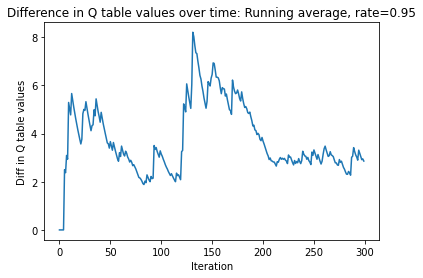

diff in Q reached below0.5  at iteration = 299
 Values of V
s0      16.021220
s1      23.008384
s2      47.666184
s3      20.507049
s4      56.980331
s5     111.617863
s6      51.872590
s7      97.636891
s8       0.000000
s9      25.282814
s10     66.409484
s11    121.594945
dtype: float64


In [116]:
#!/usr/bin/python

# qlearn.py : simple discrete, deterministic Q-learning 
#
# Requires: numpy, pandas, matplotlib
#
# Yoonsuck Choe
# choe@tamu.edu
#
# 2021. 02. 17. (wed) 09:00:58 KST
# 2021. 02. 18. (thu) 00:09:00 KST
#
# Getting started:
# 
# - pick between "console" mode (for command line) or "notebook" mode (for colab, etc). 
#     See the config section.
# 
#     mode  = "console"
#
# Suggested experiments:
#
# - change epsilon: 
#     0.1, 0.25, 0.5 (default), 0.8, 1.0 and see how the Q diff plot looks like (how fast 
#     learning converges.
#    
#     ./qlearn.pl --epsilon=0.25 
#
#     or, for notebook mode
# 
#     args.epsilon = 0.25
#     qlearn()
# 
# - change alpha: 
#     0.1, 0.25, 0.5, 0.8, 1.0 (default) and see how the Q diff plot looks like (how fast 
#     learning converges.
# 
#     ./qlearn.pl --alpha=0.25 
# 
#     or, for notebook mode
# 
#     args.alpha= 0.25
#     qlearn()
# 
# - try a new grid world environment (change section below "Environment set up".
#     search for "modify"
#
#

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode="console"
mode="notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="discount rate")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration?")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 0.3
    self.gamma = 0.9
    self.epsilon = 0.3
    self.num_iter = 300
    self.run_avg_rate = 0.95
    self.display_flag = "True"
    self.stopping_criteria = 0.5
    self.lambda_val = 0.9


#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of abs difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 (s2)
# s3 s4 s5 
# 
#   * (s1,right) and (s5,up) has reward 100, all others are 0.
#   * All actions in s2 lead back to s2, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5" , "s6" , "s7" , "s8" , "s9", "s10", "s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1, -1, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]),index=s_index),
	  "down" : pd.Series(np.array([ 3, 4, 5, 6, 7, 8, 9, 10, 8, -1, -1, -1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 1, -1, 3, 4, -1 , 6, 8, -1, 9, 10]),index=s_index),
	  "right": pd.Series(np.array([1, 2, -1, 4, 5, -1 ,7, 8, 8, 10, 11, -1]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1,-1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 100]),index=s_index),
	  "down" : pd.Series(np.array([ 0, 0, 0, 0, 0, 100, 0, 0, 0, -1, -1, -1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 0, -1, 0, 0, -1, 0, 0, -1, 0, 0]),index=s_index),
	  "right": pd.Series(np.array([ 0, 0, -1, 0, 0, -1, 0, 100, 0, 0, 0,-1]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 8

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------



  
def qlearn(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>0).astype(int)-1
  
  run_avg = 0

  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 
  prob_action = (delta>=0).astype(float)-1 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)
  sum_ersa = delta * 0
  ersa = delta * 0
  for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
    
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
     
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
      
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
    
    prob_update = prob_action.copy(deep = True)
    prob_update.iloc[s,a] = 0.7
    counter = -1
    for i in delta.iloc[s,:]:

      if i != -1:
        counter += 1
      else:
        continue


    

    for i in range(num_actions):

      if delta.iloc[s,i] == -1 or i == a:
          continue

      else:
          prob_update.iloc[s,i] = 0.3/counter

    
    while (True):

      a_ = random.randint(0,3) # generate rondom event "a"
      r = random.random()  

      if (r <= prob_update.iloc[s,a_]):  
        # accept event "a"!
        a_true = a_
        break
      else:
        # reject event "a" and repeat
        continue

    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a_true] = visits.iloc[s,a_true]+1

    alpha = 1 / (1 + visits.iloc[s,a_true])
    gamma = args.gamma
    
    # 3.1 find next state from (s,a_)

    s_next = delta.iloc[s,a_true]

    sum_ersa.iloc[s,a] += reward.iloc[s,a_true]

  
    # 3.2 update Q
  
    # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
    Q.iloc[s,a] = (1.0-alpha)*Q.iloc[s,a] + alpha*(reward.iloc[s,a] + gamma*Q.iloc[s_next,:].max())
  
  
  
    # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
  
    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
   
    

    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n))
      print(Q)
      print("diff = "+str(d[n]))

    if (n>50  and run_avg < 0.01):
 
        break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)

  print("\nSum of Ersa table\n")
  print(sum_ersa)

  print("\nErsa Table")
  ersa = sum_ersa /visits
  print(ersa)
  
  print("\nFinal visit count table\n")
  print(visits)
  
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d)
  plt.show()

  print("diff in Q reached below" + str(args.stopping_criteria) +"  at iteration = "+str(n))

  v_values = Q.max(axis = 1)
  print(" Values of V")
  print(v_values)  

#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "True"  # Set this to "True" to see the changing Q table over time.
args.epsilon = 0.3
qlearn()


# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1.

**Problem 9 (Program: 10 points)**

For all $(s,a)$, verify if the following equation in slide04-rl.pdf page 34 is approximately accurate. 


> $ Q(s,a) =      E[r(s,a)] + \gamma \sum_{s'} P(s'|s,a) \max_{a'} Q(s',a') $

For this, on the left hand side, you will simply look up your $Q$ table. The $P(s'|s,a)$ are defined in the beginning of Section II: It is 0.70 for the intended direction, and 0.1, 0.15, or 0.3 for unintended directions, depending on the number of legal moves from $s$.

```
Q.iloc[s,a]
```

On the right hand side, you will compute 

```
Ersa.iloc[s,a] + args.gamma * ( .... + p * Q.iloc[s_prime,:].max() + .... )    

# p = 0.7, if s_prime was in the intended direction, and 
# p = 0.1 or 0.15 or 0.3, for unintended direction, depending on the number of
# legal moves from s.  
``` 
Verify the above two are nearly identical. 
1. Q.iloc[s,a]9
2. Ersa.iloc[s,a] + args.gamma * ( ....+ p * Q.iloc[s_prime,:].max() + .... )    



**Answer**

Write your code to compute the above, in the code cell below, and print the Q table, and the Ersa.iloc[s,a]+ args.gamma* ... results here. 



Delta
     up  down  left  right
s0   -1     3    -1      1
s1   -1     4     0      2
s2   -1     5     1     -1
s3    0     6    -1      4
s4    1     7     3      5
s5    2     8     4     -1
s6    3     9    -1      7
s7    4    10     6      8
s8    8     8     8      8
s9    6    -1    -1     10
s10   7    -1     9     11
s11   8    -1    10     -1


Reward
      up  down  left  right
s0    -1     0    -1      0
s1    -1     0     0      0
s2    -1     0     0     -1
s3     0     0    -1      0
s4     0     0     0      0
s5     0   100     0     -1
s6     0     0    -1      0
s7     0     0     0    100
s8     0     0     0     -1
s9     0    -1    -1      0
s10    0    -1     0      0
s11  100    -1     0     -1


Q: initial
           up      down      left     right
s0  -1.000000  0.000041 -1.000000  0.000169
s1  -1.000000  0.000155 -1.000000  0.000902
s2  -1.000000  0.000163  0.000864 -1.000000
s3  -1.000000  0.000432 -1.000000  0.000996
s4   0.000475  0.000775  0.000945  

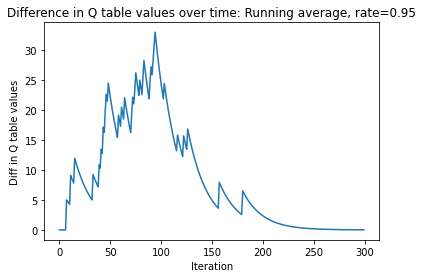

diff in Q reached below 0.01 at iteration = 299
Running average
0.014492641275920055


In [114]:
# LHS:


import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode="console"
mode="notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="discount rate")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration?")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 1.0
    self.gamma = 0.9
    self.epsilon = 0.5
    self.num_iter = 300
    self.run_avg_rate = 0.95
    self.display_flag = "True"

#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of abs difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 (s2)
# s3 s4 s5 
# 
#   * (s1,right) and (s5,up) has reward 100, all others are 0.
#   * All actions in s2 lead back to s2, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5","s6","s7","s8","s9","s10","s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1,-1, -1, 0, 1, 2, 3, 4, 8, 6, 7, 8]),index=s_index),
	  "down" : pd.Series(np.array([ 3, 4, 5, 6, 7, 8, 9, 10, 8, -1, -1, -1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 1, -1, 3, 4, -1, 6, 8, -1, 9, 10]),index=s_index),
	  "right": pd.Series(np.array([ 1, 2, -1, 4, 5,-1, 7, 8, 8, 10, 11, -1,]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1, -1,  -1,  0,  0, 0, 0, 0, 0, 0, 0, 100]),index=s_index),
	  "down" : pd.Series(np.array([ 0,  0,  0, 0, 0, 100, 0, 0, 0, -1, -1, -1]),index=s_index),
	  "left" : pd.Series(np.array([-1,  0,  0, -1,  0,  0, -1, 0, 0, -1, 0, 0]),index=s_index),
	  "right": pd.Series(np.array([ 0, 0,  -1,  0,  0, -1, 0, 100, -1, 0, 0, -1]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 8

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------

def qlearn(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  
  run_avg = 0
  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>0).astype(float)-1.0 + (delta>0)*np.random.rand(12,4)*0.001
 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)
  
  for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a] = visits.iloc[s,a]+1

    alpha = args.alpha
    gamma = args.gamma
  
    # 3.1 find next state from (s,a)
  
    s_next = delta.iloc[s,a]
  
    # 3.2 update Q
  
    # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
    Q.iloc[s,a] = (1.0-alpha)*Q.iloc[s,a] + alpha*(reward.iloc[s,a] + gamma*Q.iloc[s_next,:].max())
  
  
    # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
  
    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
   


    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n))
      print(Q)
      print("diff = "+str(d[n]))

    if (n>50  and run_avg < 0.01):
 
        break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)
  
  print("\nFinal visit count table\n")
  print(visits)
  
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d)
  plt.show()

  print("diff in Q reached below 0.01 at iteration = "+str(n))
  print('Running average')
  print(run_avg)
#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to "True" to see the changing Q table over time.
args.epsilon = 1.0
qlearn()

# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1. 




Delta
     up  down  left  right
s0   -1     3    -1      1
s1   -1     4     0      2
s2   -1     5     1     -1
s3    0     6    -1      4
s4    1     7     3      5
s5    2     8     4     -1
s6    3     9    -1      7
s7    4    10     6      8
s8    5     8     8      8
s9    6    -1    -1     10
s10   7    -1     9     11
s11   8    -1    10     -1


Reward
      up  down  left  right
s0    -1     0    -1      0
s1    -1     0     0      0
s2    -1     0     0     -1
s3     0     0    -1      0
s4     0     0     0      0
s5     0   100     0     -1
s6     0     0    -1      0
s7     0     0     0    100
s8     0     0     0      0
s9     0    -1    -1      0
s10    0    -1     0      0
s11  100    -1     0     -1


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0   -1.0
s3   0.0   0.0  -1.0    0.0
s4   0.0   0.0   0.0    0.0
s5   0.0   0.0   0.0   -1.0
s6   0.0   0.0  -1.0    0.0
s7   0.0   0.0   0.0    0.0
s8 

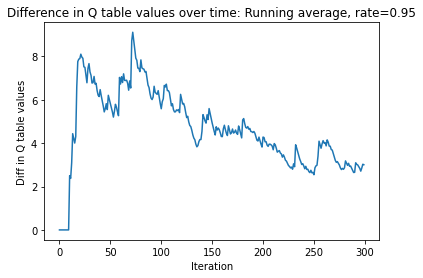

diff in Q reached below0.5  at iteration = 299
 Values of V
s0      20.174506
s1      34.603955
s2      50.586026
s3      29.920212
s4      55.187512
s5     103.801867
s6      74.240000
s7     133.293990
s8       0.000000
s9      61.395764
s10     85.886711
s11    119.485242
dtype: float64


In [132]:
#RHS
#!/usr/bin/python

# qlearn.py : simple discrete, deterministic Q-learning 
#
# Requires: numpy, pandas, matplotlib
#
# Yoonsuck Choe
# choe@tamu.edu
#
# 2021. 02. 17. (wed) 09:00:58 KST
# 2021. 02. 18. (thu) 00:09:00 KST
#
# Getting started:
# 
# - pick between "console" mode (for command line) or "notebook" mode (for colab, etc). 
#     See the config section.
# 
#     mode  = "console"
#
# Suggested experiments:
#
# - change epsilon: 
#     0.1, 0.25, 0.5 (default), 0.8, 1.0 and see how the Q diff plot looks like (how fast 
#     learning converges.
#    
#     ./qlearn.pl --epsilon=0.25 
#
#     or, for notebook mode
# 
#     args.epsilon = 0.25
#     qlearn()
# 
# - change alpha: 
#     0.1, 0.25, 0.5, 0.8, 1.0 (default) and see how the Q diff plot looks like (how fast 
#     learning converges.
# 
#     ./qlearn.pl --alpha=0.25 
# 
#     or, for notebook mode
# 
#     args.alpha= 0.25
#     qlearn()
# 
# - try a new grid world environment (change section below "Environment set up".
#     search for "modify"
#
#

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode="console"
mode="notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="discount rate")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration?")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 0.3
    self.gamma = 0.9
    self.epsilon = 0.3
    self.num_iter = 300
    self.run_avg_rate = 0.95
    self.display_flag = "True"
    self.stopping_criteria = 0.5
    self.lambda_val = 0.9


#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of abs difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 (s2)
# s3 s4 s5 
# 
#   * (s1,right) and (s5,up) has reward 100, all others are 0.
#   * All actions in s2 lead back to s2, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5" , "s6" , "s7" , "s8" , "s9", "s10", "s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1, -1, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]),index=s_index),
	  "down" : pd.Series(np.array([ 3, 4, 5, 6, 7, 8, 9, 10, 8, -1, -1, -1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 1, -1, 3, 4, -1 , 6, 8, -1, 9, 10]),index=s_index),
	  "right": pd.Series(np.array([1, 2, -1, 4, 5, -1 ,7, 8, 8, 10, 11, -1]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1,-1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 100]),index=s_index),
	  "down" : pd.Series(np.array([ 0, 0, 0, 0, 0, 100, 0, 0, 0, -1, -1, -1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 0, -1, 0, 0, -1, 0, 0, -1, 0, 0]),index=s_index),
	  "right": pd.Series(np.array([ 0, 0, -1, 0, 0, -1, 0, 100, 0, 0, 0,-1]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 8

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------



  
def qlearn(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>0).astype(int)-1
  
  run_avg = 0

  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 
  prob_action = (delta>=0).astype(float)-1 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)
  sum_ersa = delta * 0
  ersa = delta * 0
  for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
    
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
     
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
      
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
    
    prob_update = prob_action.copy(deep = True)
    prob_update.iloc[s,a] = 0.7
    counter = -1
    for i in delta.iloc[s,:]:

      if i != -1:
        counter += 1
      else:
        continue


    

    for i in range(num_actions):

      if delta.iloc[s,i] == -1 or i == a:
          continue

      else:
          prob_update.iloc[s,i] = 0.3/counter

    
    while (True):

      a_ = random.randint(0,3) # generate rondom event "a"
      r = random.random()  

      if (r <= prob_update.iloc[s,a_]):  
        # accept event "a"!
        a_true = a_
        break
      else:
        # reject event "a" and repeat
        continue

    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a_true] = visits.iloc[s,a_true]+1

    alpha = 1 / (1 + visits.iloc[s,a_true])
    gamma = args.gamma
    
    # 3.1 find next state from (s,a_)

    s_next = delta.iloc[s,a_true]

    sum_ersa.iloc[s,a] += reward.iloc[s,a_true]

  
    # 3.2 update Q
  
    # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
    Q.iloc[s,a] = (1.0-alpha)*Q.iloc[s,a] + alpha*(reward.iloc[s,a] + gamma*Q.iloc[s_next,:].max())
  
  
  
    # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
  
    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
   
    

    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n))
      print(Q)
      print("diff = "+str(d[n]))

    if (n>50  and run_avg < 0.01):
 
        break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)

  print("\nSum of Ersa table\n")
  print(sum_ersa)

  print("\nErsa Table")
  ersa = sum_ersa /visits
  print(ersa)
  
  print("\nFinal visit count table\n")
  print(visits)

  print("\nFinal Q table\n")
  print(Q)
  
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d)
  plt.show()

  print("diff in Q reached below" + str(args.stopping_criteria) +"  at iteration = "+str(n))

  v_values = Q.max(axis = 1)
  print(" Values of V")
  print(v_values)  

#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "True"  # Set this to "True" to see the changing Q table over time.
args.epsilon = 0.3
qlearn()


# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1.

By Comparing both the Q table. it's approximately similar. LHS=RHS.